## StatML4PopHealth workshop

[@ohidaoui](https://github.com/ohidaoui)

In [36]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import arviz as az

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may import additional libraries if needed

# Aesthetics
sns.set_theme(style="whitegrid")
plt.rc('axes', titlesize=18, labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['font.size'] = 14

In [37]:
!curl -O "https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/main/practicals/resources/scripts/utilities.py"

from utilities import custom_install_cmdstan, test_cmdstan_installation

custom_install_cmdstan()


In [38]:
africa = pd.read_csv('https://raw.githubusercontent.com/MLGlobalHealth/StatML4PopHealth/refs/heads/main/data/africa_who_life_expectancy.csv')
africa.head(10)

Country           Region  Year  Infant_deaths  Under_five_deaths  \
0       Comoros      East Africa  2007           66.8               91.9   
1         Gabon   Central Africa  2012           39.1               57.1   
2         Ghana      West Africa  2011           45.2               65.9   
3   Congo, Rep.   Central Africa  2003           64.6              100.2   
4    Madagascar  Southern Africa  2011           45.8               67.0   
5      Cameroon   Central Africa  2015           57.0               88.0   
6      Zimbabwe  Southern Africa  2009           54.0               91.3   
7  South Africa  Southern Africa  2006           48.7               79.2   
8       Eritrea      East Africa  2012           36.8               51.2   
9    Seychelles      East Africa  2011           12.2               14.2   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         255.8815                 0.15           75       64  23.5  ...   
1         256.8800                 7.47           82       64  24.9  ...   
2         257.0865                 1.67           91       58  23.7  ...   
3         406.7020                 0.90           71       64  22.3  ...   
4         237.6755                 0.89           73       64  21.1  ...   
5         340.1265                 4.55           84       64  24.3  ...   
6         551.9115                 2.77           73       64  23.6  ...   
7         515.7180                 7.30           83       53  26.6  ...   
8         274.0290                 1.03           94       88  20.6  ...   
9         154.4505                 7.83           99       99  26.3  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          75           0.02            1166            0.64   
1          82           1.57            7181            1.75   
2          91           0.93            1580           25.39   
3          50           2.23            2072            3.41   
4          73           0.15             464           21.74   
5          84           1.12            1383           23.30   
6          73           7.31             941           12.53   
7          82          11.13            5827           48.49   
8          94           0.18             699            3.28   
9          99           3.50           13664            0.09   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          7.3                       7.2        3.5   
1                          6.3                       6.2        7.8   
2                          6.9                       6.8        6.8   
3                          9.1                       8.8        5.7   
4                          7.5                       7.4        6.1   
5                          5.6                       5.5        6.1   
6                          7.5                       7.4        7.2   
7                          1.6                      12.8        9.0   
8                          8.7                       8.6        3.9   
9                          5.7                       6.1        8.4   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             60.7  
1                         0                          1             62.9  
2                         0                          1             61.4  
3                         0                          1             53.8  
4                         0                          1             63.8  
5                         0                          1             57.6  
6                         0                          1             48.4  
7                         0                          1             53.8  
8                         0                          1             63.2  
9                         0                          1             72.7  

[10 rows x 21 columns]

# Final Assessment

Our task is investigating the relationship between various population health indicators and life expectancy to inform government policy decisions on resource allocation and public health priorities. Employing Bayesian statistical methods, our objective is to conduct a rigorous analysis of the World Health Organization (WHO) life expectancy dataset, interpret the results within the context of existing literature, and propose evidence-based recommendations for policy improvements.


## Dataset

The dataset is an updated subset of the WHO life expectancy dataset, specifically focused on the African continent. It comprises data from 51 countries covering the period from 2000 to 2015, with a total of 816 observations and 21 variables. The dataset includes a broad spectrum of indicators, ranging from health and immunization measures to economic and demographic factors. The variables are defined as follows:

- Country: Name of the country
- Region: Geographical region within Africa
- Year: Year of observation
- Infant_deaths: Number of infant deaths per 1000 population
- Under_five_deaths: Number of deaths among children under five per 1000 population
- Adult_mortality: Number of adult deaths per 1000 population
- Alcohol_consumption: Per capita alcohol consumption (liters for individuals aged 15 and older)
- Hepatitis_B: Immunization coverage against Hepatitis B among 1-year-olds (%)
- Measles: Immunization coverage against measles among 1-year-olds (%)
- BMI: Average Body Mass Index of the population
- Polio: Polio immunization coverage among 1-year-olds (%)
- Diphtheria: Coverage for DTP3 (Diphtheria, Tetanus, Pertussis) immunization among 1-year-olds (%)
- Incidents_HIV: Incidence of HIV per 1000 population (ages 15-49)
- GDP_per_capita: Gross Domestic Product per capita (in USD)
- Population_mln: Population size in millions
- Thinness_ten_nineteen_years: Prevalence of thinness among adolescents (ages 10-19, %)
- Thinness_five_nine_years: Prevalence of thinness among children (ages 5-9, %)
- Schooling: Average years of schooling for individuals aged 25 or older
- Economy_status_Developed: Indicator variable for developed country status
- Economy_status_Developing: Indicator variable for developing country status
- Life_expectancy: Average life expectancy (in years)

## 1. Exploratory Data Analysis (EDA)

### 1.1 Temporal Analysis of Life Expectancy

We will initiate our analysis by examining the temporal evolution of life expectancy across countries. We will construct time series plots for each country to assess the progression of life expectancy over time. Scrutinize these visualizations for overarching trends and notable deviations. Identify any countries that exhibit anomalous patterns and consider potential explanatory factors, such as socioeconomic disparities, healthcare policies, or regional environmental influences.


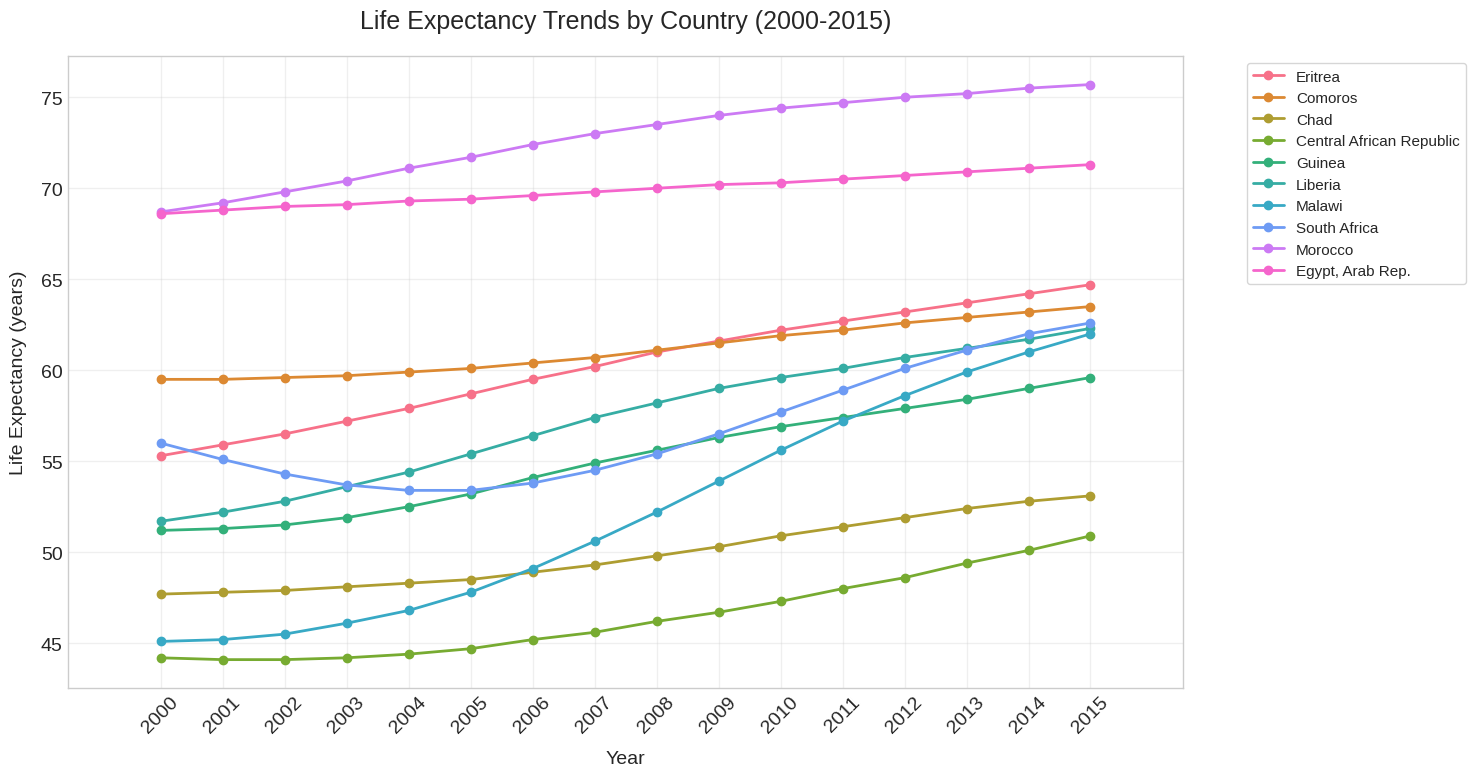

In [55]:
def plot_life_expectancy_trends(df, selected_countries=None, save_path=None):
    """
    Plot life expectancy trends for selected countries.
    """
    plt.figure(figsize=(15, 8))
    
    if selected_countries is None:
        # Default behavior: chose 2 countries randomly from each Region
        regions = df['Region'].unique()
        selected_countries = []
        for region in regions:
            countries = df[df['Region'] == region]['Country'].unique()
            selected_countries += np.random.choice(countries, size=2, replace=False).tolist()

    # Color palette for different countries
    colors = sns.color_palette("husl", len(selected_countries))
    
    # Plot for each selected country
    for idx, country in enumerate(selected_countries):
        # country_data = df[df['Country'] == country]        # Get data for the country and remove duplicates
        country_data = df[df['Country'] == country].drop_duplicates(['Country', 'Year'])
        country_data = country_data.sort_values('Year')  # Ensure data is sorted by year
        if country_data.empty:
            print(f"Warning: No data found for country {country}")
            continue
            
        # Determine if country is developed or developing
        if country_data['Economy_status_Developed'].iloc[0] == 1:
            status = "Developed"
        elif country_data['Economy_status_Developing'].iloc[0] == 1:
            status = "Developing"
        else:
            status = "Undeveloped"
        
        # Plot with different styles for developed vs developing
        plt.plot(country_data['Year'], country_data['Life_expectancy'], 
                label=f'{country}', #  ({status})
                color=colors[idx],
                marker='o',
                # linestyle='-' if status=='Developing' else '--',
                linewidth=2,
                markersize=6)
    
    plt.title('Life Expectancy Trends by Country (2000-2015)', pad=20)
    plt.xlabel('Year', labelpad=10)
    plt.ylabel('Life Expectancy (years)', labelpad=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
    plt.grid(True, alpha=0.3)
    
    # Add some padding to the plot
    plt.margins(x=0.1)
    
    # Ensure the year axis shows all years
    plt.xticks(df['Year'].unique(), rotation=45)
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        plt.show()

selected_countries = ['Nigeria', 'South Africa', 'Egypt, Arab Rep.', 'Kenya', 'Ghana', 'Tunisia', 'Morocco', 'Algeria', 'Angola']
plot_life_expectancy_trends(africa)



This plot illustrates the evolution of life expectancy in selected African countries. Morocco shows a steady upward trajectory, maintaining one of the highest life expectancies across the continent. South Africa exhibits a decline in the early 2000s, likely reflecting the impact of the HIV/AIDS epidemic, followed by a recovery post-2005. Malawi demonstrates a particularly sharp rise in life expectancy after 2005, highlighting possible improvements in healthcare and HIV treatment accessibility. These contrasting trends underscore the importance of regional health interventions and socioeconomic context in shaping life expectancy outcomes.


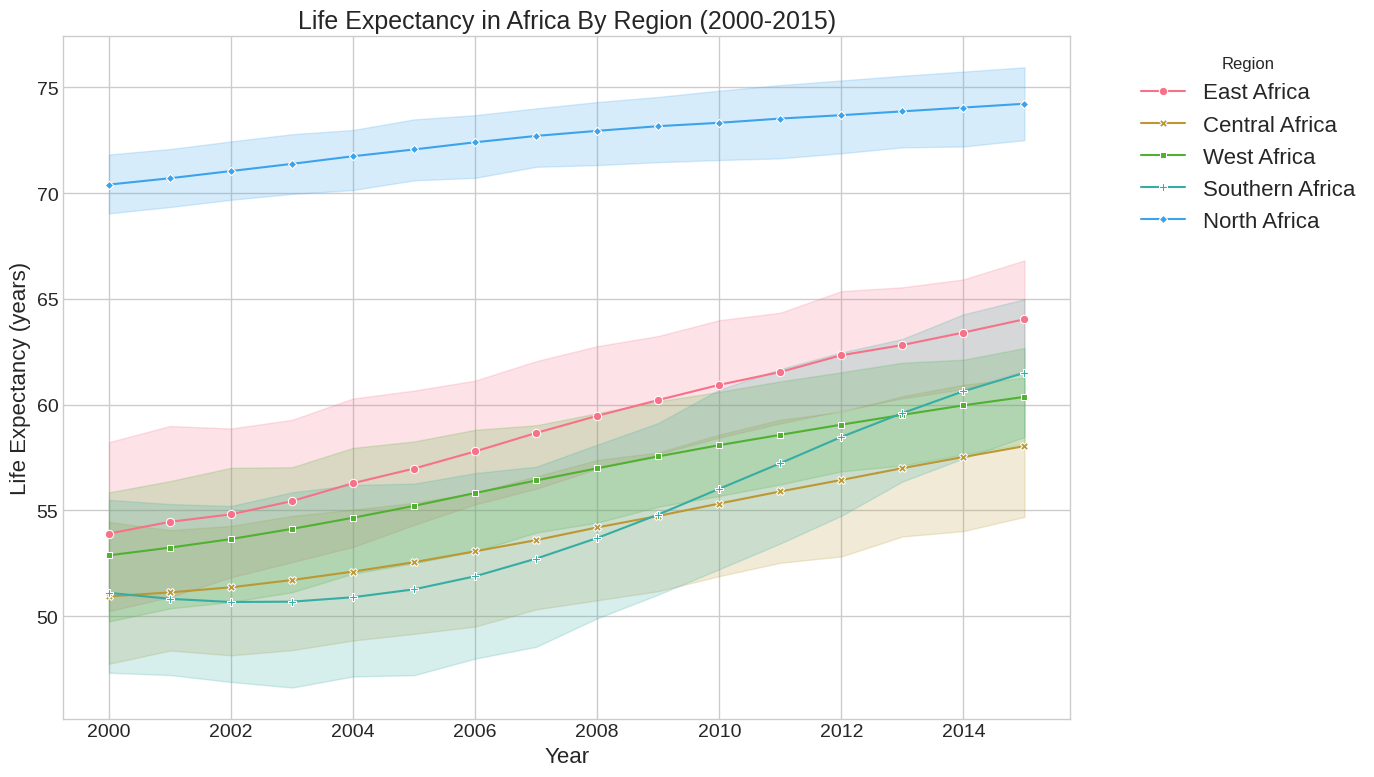

In [46]:
def plot_life_expectancy_by_region(df, save_path=None):
    """Plot life expectancy by region"""
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x="Year", y="Life_expectancy", hue="Region", style="Region", markers=True, dashes=False)
    plt.title("Life Expectancy in Africa By Region (2000-2015)")
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Life Expectancy (years)", fontsize=16)
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc=2, fontsize=16)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        plt.show()

plot_life_expectancy_by_region(africa)

This figure shows the average life expectancy in five African regions—East, Central, West, Southern, and North—from 2000 to 2015. Each colored line represents one region, with shaded bands indicating uncertainty. North Africa consistently has the highest life expectancy, while Central Africa remains lowest. All regions exhibit an upward trend over the period, although the rate of improvement varies by region.


###  1.2 Analysis of Variable Relationships

Now, we will examine the associations between `Life_expectancy` and the remaining variables in the dataset using appropriate visualization techniques such as scatter plots, box plots, or other relevant methods. As a preliminary step, we will subset the dataset to include only observations from the year 2008. Identify and describe the patterns that emerge, highlighting any variables that exhibit a particularly strong or consistent relationship with life expectancy. Will will provide an academic discussion on the potential underlying factors—whether socioeconomic, demographic, or health-related—that might explain these observed relationships.

In [9]:
africa_2008 = africa[africa['Year'] == 2008].copy()
africa_2008.drop(columns='Year', inplace=True)
# Economy_status_Developed and Economy_status_Developing should not be numeric
africa_2008['Economy_status_Developed'] = africa_2008['Economy_status_Developed'].astype(object)
africa_2008['Economy_status_Developing'] = africa_2008['Economy_status_Developing'].astype(object)

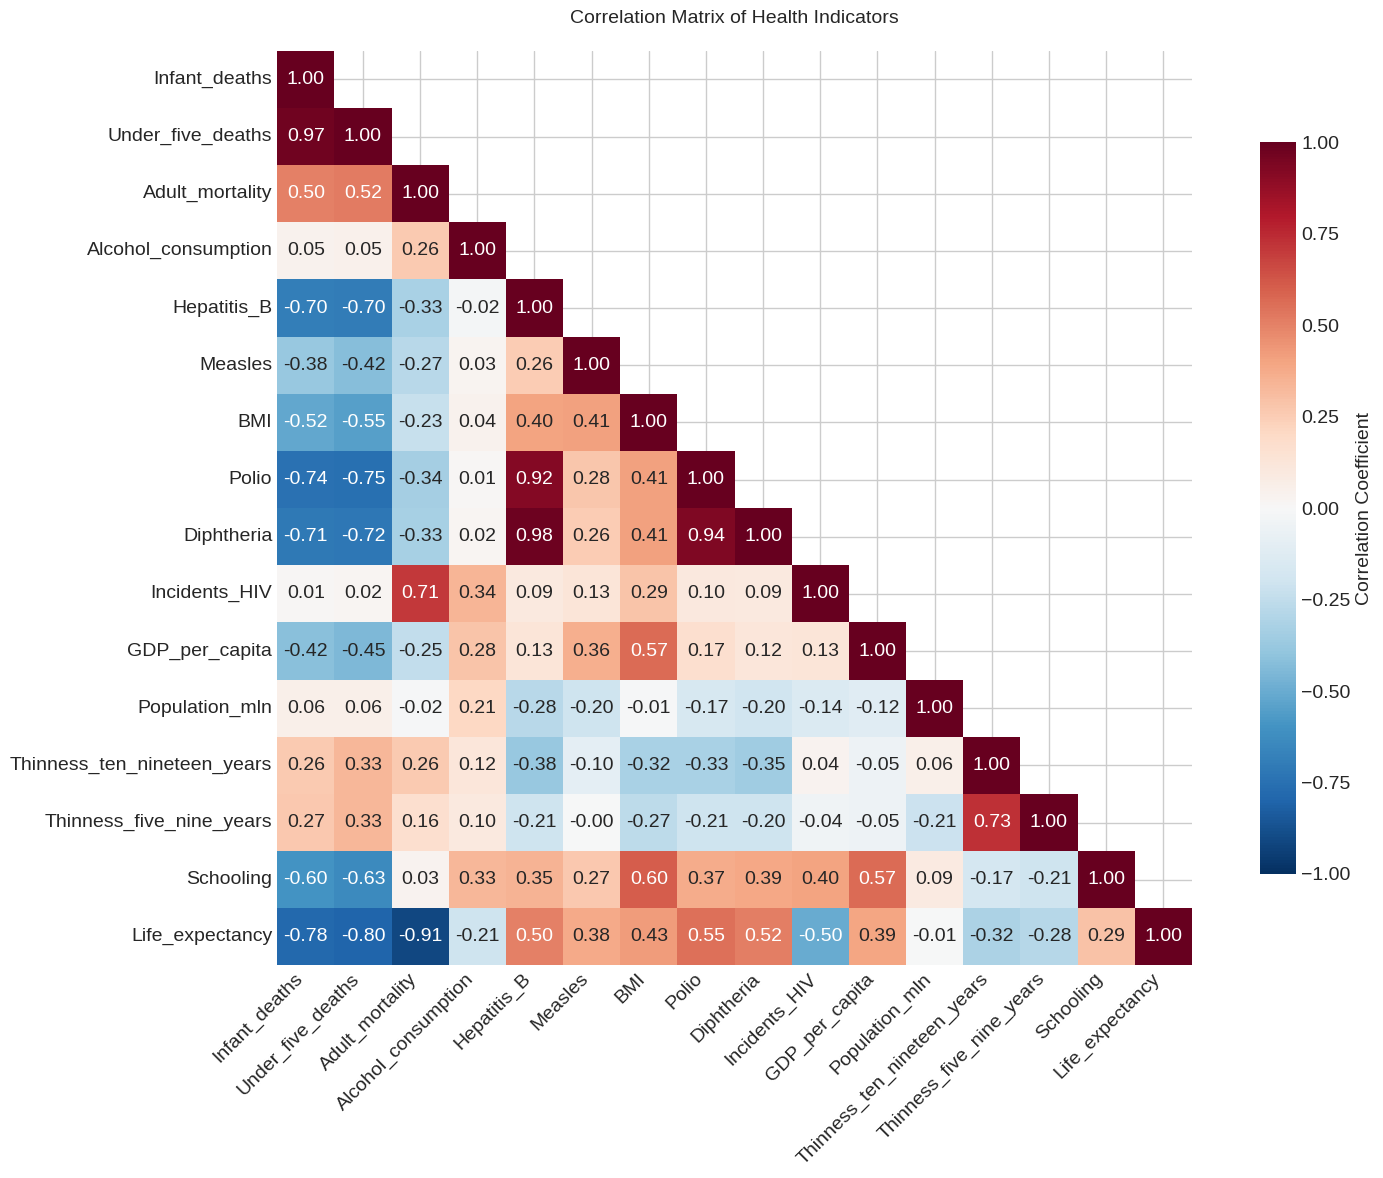

In [10]:
# Correlation heatmap

def plot_correlation_heatmap(df, save_path=None):
    """Create correlation heatmap for numerical variables showing only upper triangle."""
    # Select numerical columns and remove binary economic status indicators
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    numerical_cols = [col for col in numerical_cols if not col.startswith('Economy_status_')]
    
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Generate mask for upper triangle
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
    
    # Create figure
    # plt.figure(figsize=(15, 12))
    
    # Create heatmap with mask
    sns.heatmap(corr_matrix, 
                mask=~mask,  # Mask upper triangle
                annot=True,  # Show correlation values
                cmap='RdBu_r',  # Red-Blue diverging colormap
                center=0,  # Center colormap at 0
                fmt='.2f',  # Format correlation values to 2 decimal places
                square=True,  # Make cells square
                cbar_kws={'shrink': .8, 'label': 'Correlation Coefficient'},
                annot_kws={'size': 14},  # Adjust annotation text size
                vmin=-1, vmax=1)  # Fix scale from -1 to 1
    
    plt.title('Correlation Matrix of Health Indicators', pad=20, size=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        plt.show()


plot_correlation_heatmap(africa_2008)

This heatmap shows pairwise correlations among key health and socioeconomic indicators. Life expectancy is strongly negatively correlated with infant deaths (–0.78), under-five deaths (–0.80), and adult mortality (–0.91), highlighting the high association between early and adult mortality and population longevity. It is positively correlated with schooling (0.29) and immunization variables such as Polio (0.55) and Diphtheria (0.52), suggesting a beneficial role of education and vaccination coverage in improving life expectancy. These associations help guide variable selection for modeling and policy focus areas.


In [11]:
selected_numerical_covariates = [
       'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
]

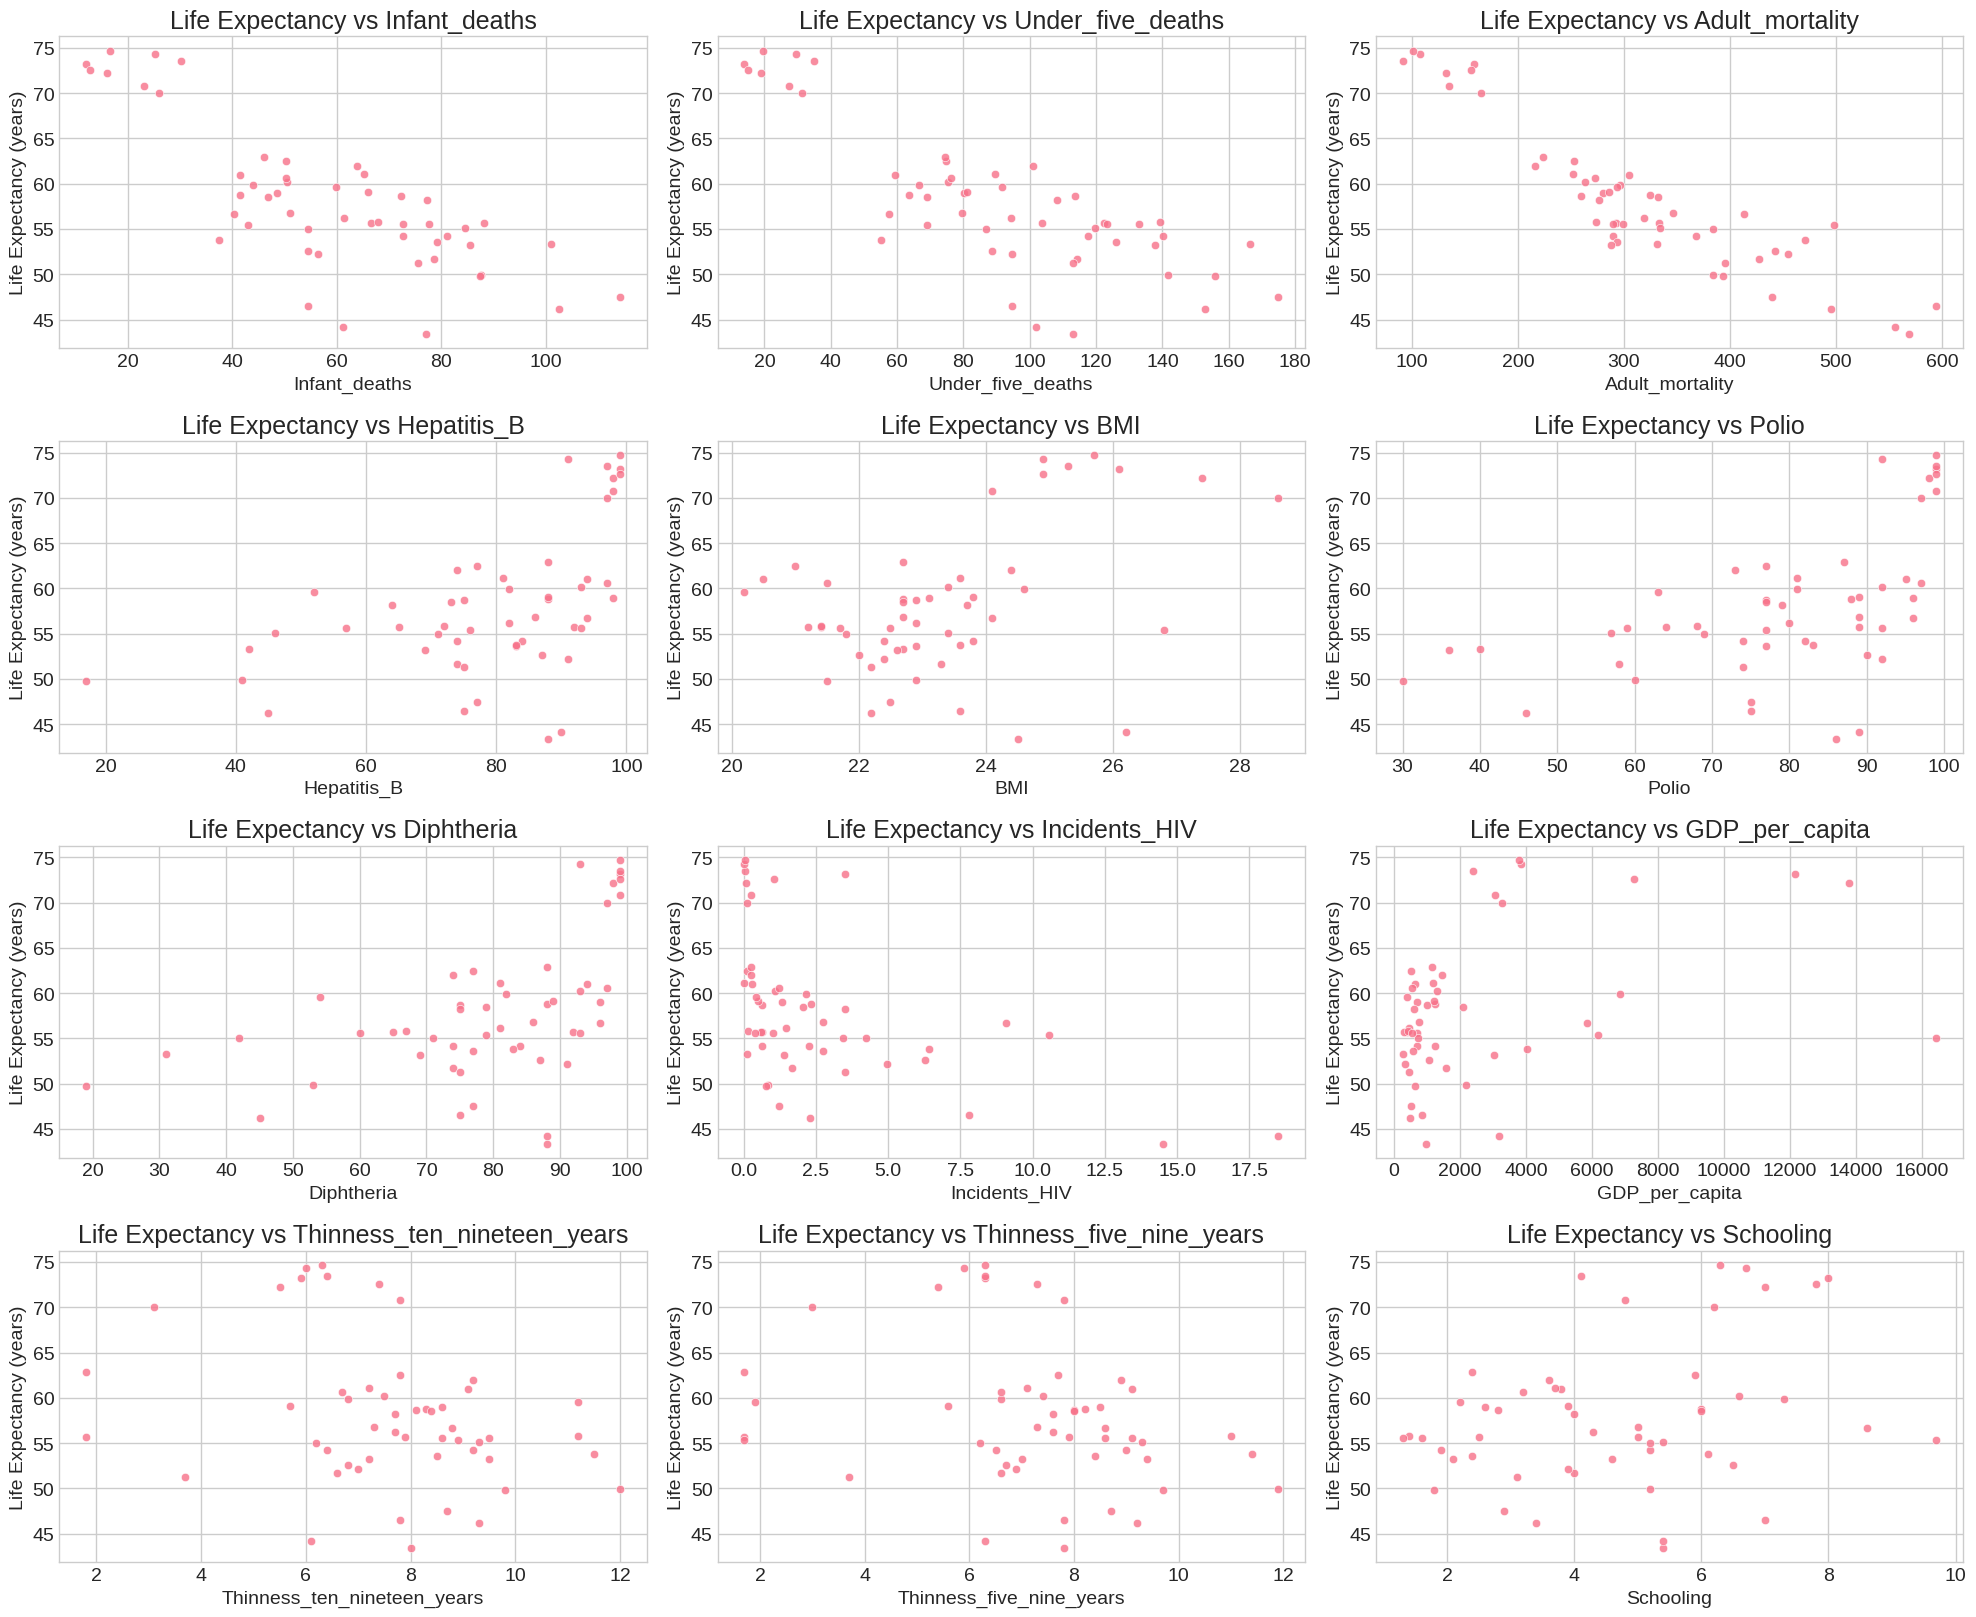

In [12]:
# Scatter plot grid

def plot_scatter_grid(df, selected_covariates, save_path=None):
    """Create a grid of scatter plots for key variables against life expectancy."""
    # Create a nxn grid of scatter plots
    fig, axes = plt.subplots(5, 3, figsize=(20, 20))
    axes = axes.ravel()
    
    for idx, var in enumerate(selected_covariates):
        sns.scatterplot(data=df, x=var, y='Life_expectancy', 
                        alpha=0.8, ax=axes[idx]) # hue='Region',
        axes[idx].set_title(f'Life Expectancy vs {var}')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Life Expectancy (years)')
    
    # Remove empty subplots if any
    for idx in range(len(selected_covariates), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
        plt.close()
    else:
        plt.show()


plot_scatter_grid(africa_2008, selected_numerical_covariates)


In [13]:
africa_2008['Log_GDP_per_capita'] = np.log(africa_2008['GDP_per_capita'])
africa_2008['Log_Incidents_HIV'] = np.log(africa_2008['Incidents_HIV'])

selected_vars = [
       'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 
       'BMI', 'Polio', 'Diphtheria', 'Log_Incidents_HIV', 'Log_GDP_per_capita', 
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
]

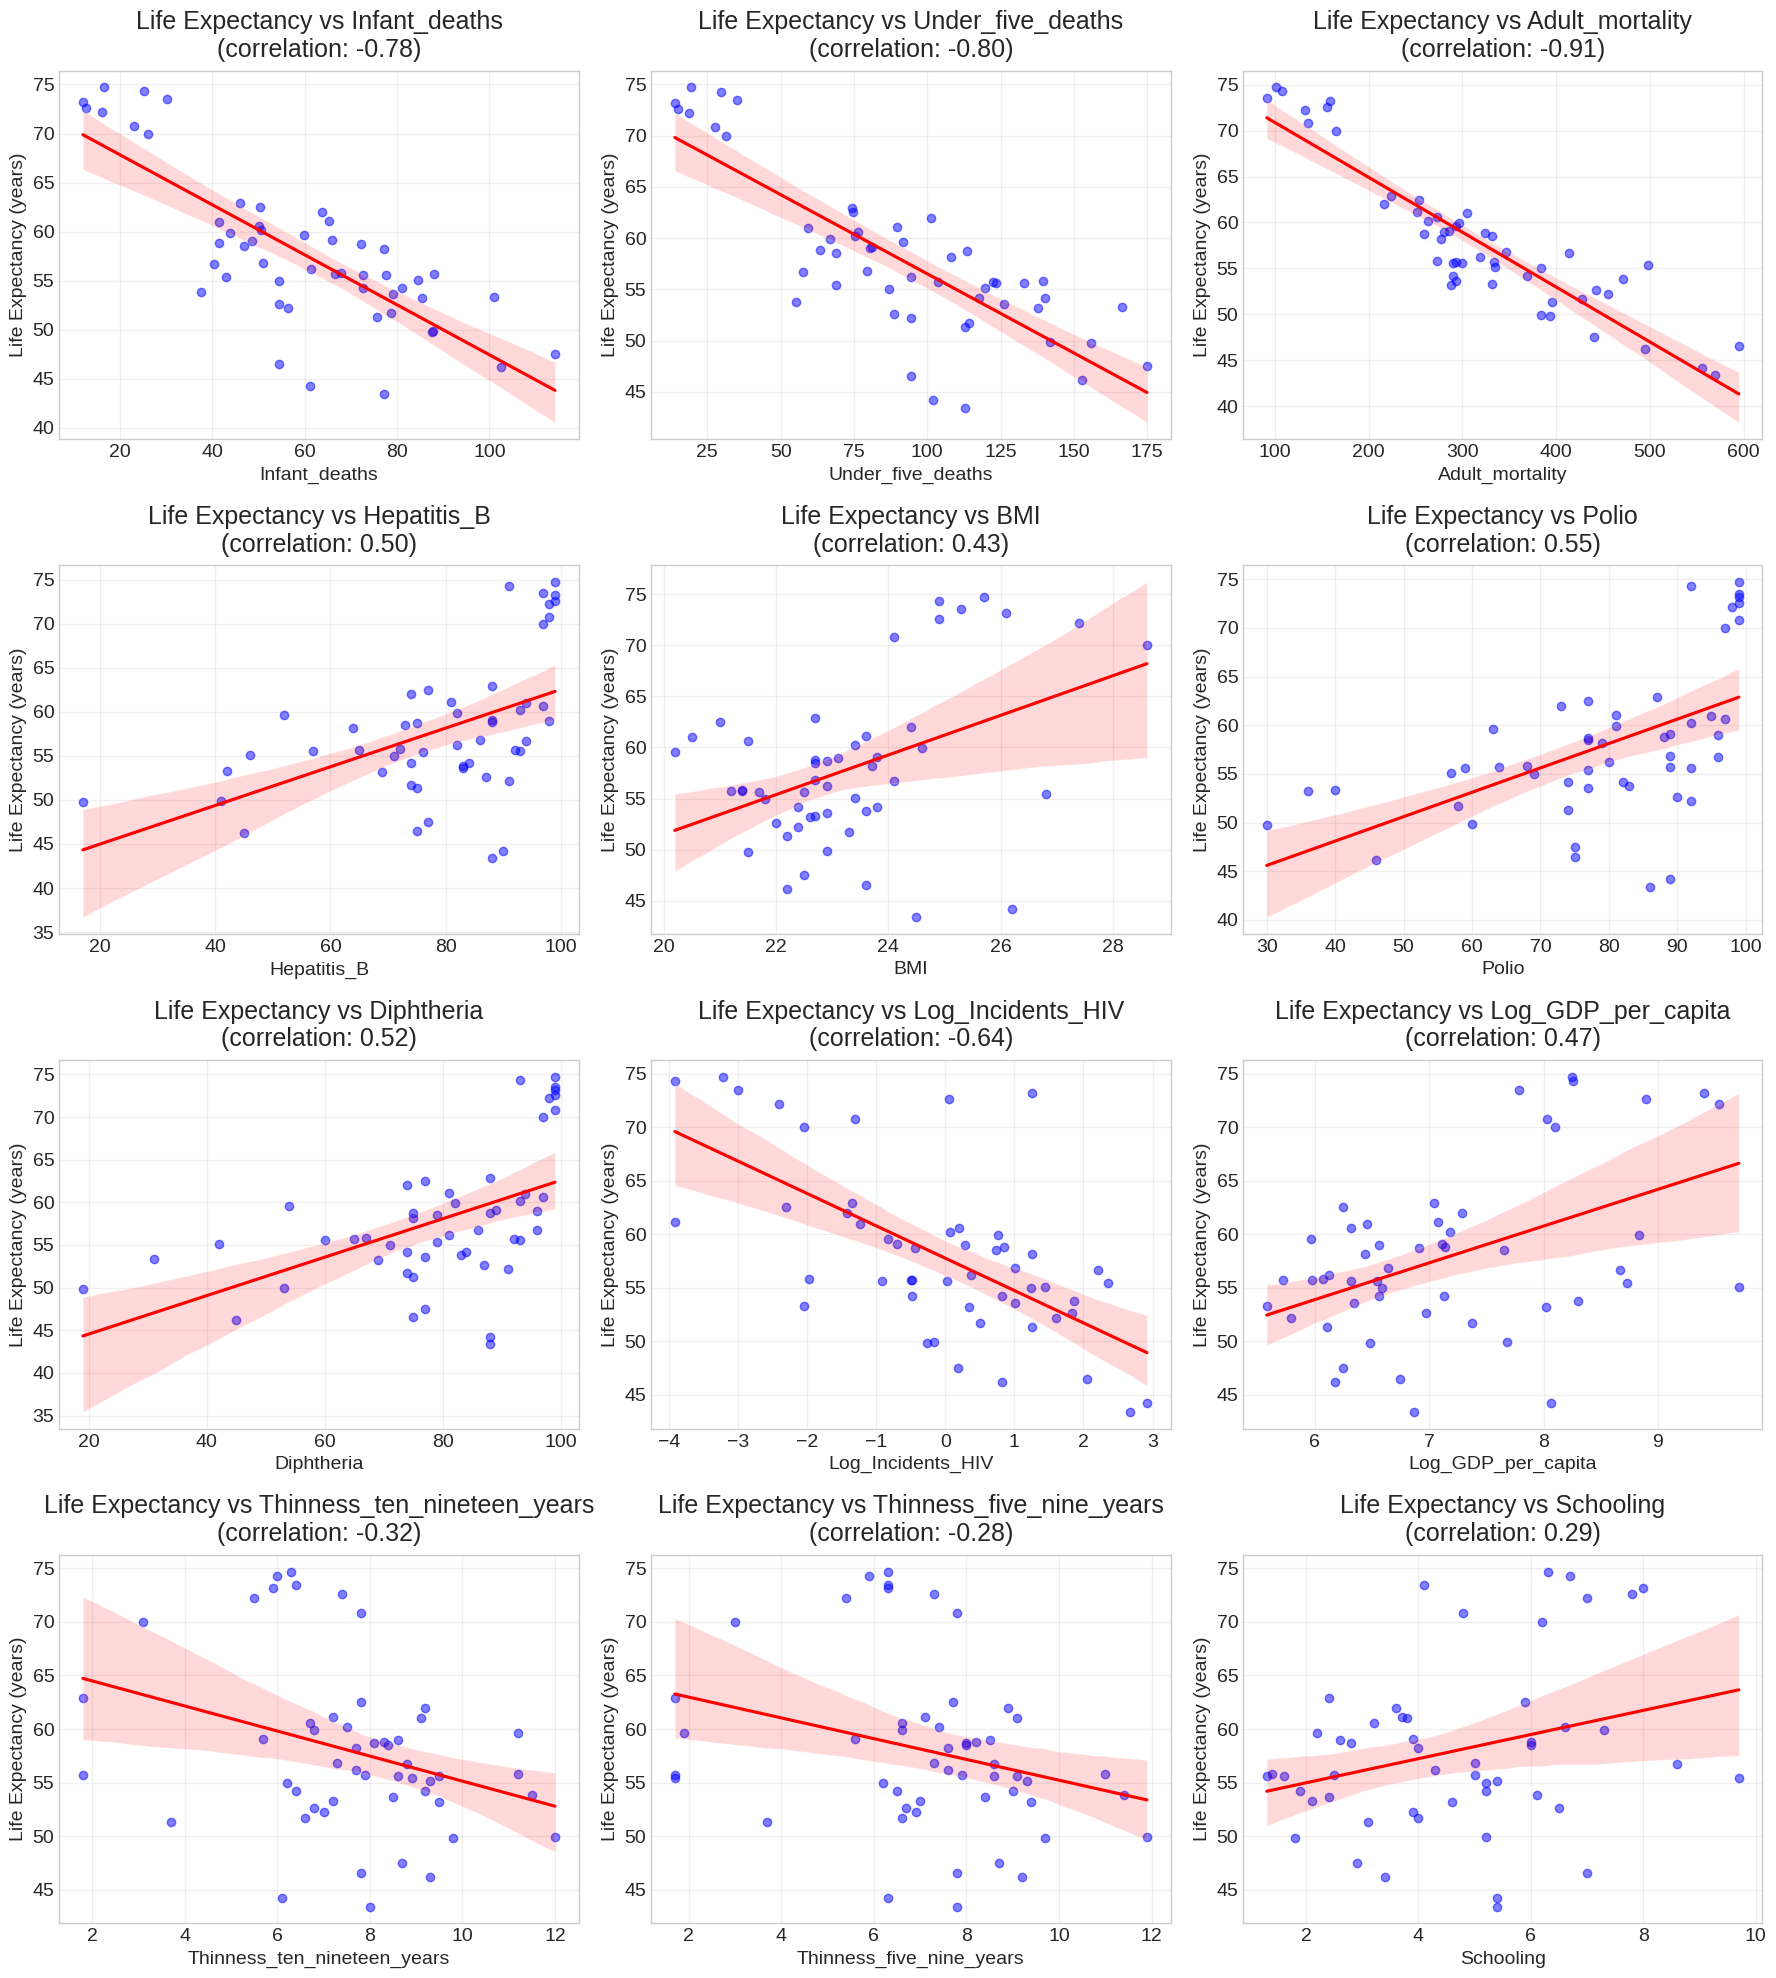

In [14]:
def plot_reg_scatter_grid(df, selected_vars, save_path=None):
    """
    Create a grid of scatter plots with linear fits for selected variables against life expectancy.
    """

    # Calculate number of rows and columns needed
    n_vars = len(selected_vars)
    n_cols = min(3, n_vars)  # Maximum 3 columns
    n_rows = (n_vars + n_cols - 1) // n_cols  # Ceiling division
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
    axes = axes.ravel() if n_vars > 1 else [axes]  # Handle single plot case
    
    # Create scatter plots with regression lines
    for idx, var in enumerate(selected_vars):
        # Create scatter plot
        sns.regplot(data=df, x=var, y='Life_expectancy',
                   ax=axes[idx],
                   scatter_kws={'alpha': 0.5, 'color': 'blue'},
                   line_kws={'color': 'red'},
                   ci=95)  # Add 95% confidence interval
        
        # Calculate correlation coefficient
        corr = df[['Life_expectancy', var]].corr().iloc[0, 1]
        
        # Customize plot
        axes[idx].set_title(f'Life Expectancy vs {var}\n(correlation: {corr:.2f})',
                          pad=10)
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Life Expectancy (years)')
        axes[idx].grid(True, alpha=0.3)
    
    # Remove empty subplots if any
    for idx in range(n_vars+1, len(axes)):
        fig.delaxes(axes[idx])
    
    # Adjust layout
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        plt.show()

plot_reg_scatter_grid(africa_2008, selected_vars)

This figure presents a grid of scatterplots showing the relationship between life expectancy and 12 key predictors across African countries. Each subplot includes a regression line with a shaded 95% confidence interval and displays the Pearson correlation coefficient. Variables such as infant deaths, under-five deaths, adult mortality, and HIV incidence show strong negative associations with life expectancy, while vaccination coverage (e.g., Polio, Hepatitis B), BMI, GDP per capita, and schooling are positively correlated. These visualizations highlight which factors are most linearly associated with longevity and help guide variable selection for the regression model.


In [15]:
africa_2008['Economy_status_Developed'] = africa_2008['Economy_status_Developed'].astype(int)
africa_2008['Economy_status_Developing'] = africa_2008['Economy_status_Developing'].astype(int)

developed_countries = africa_2008[africa_2008['Economy_status_Developed'] == 1]['Country'].unique()
developing_countries = africa_2008[africa_2008['Economy_status_Developing'] == 1]['Country'].unique()
# Countries that are not developed nor developing
undeveloped_countries = africa_2008[(africa_2008['Economy_status_Developed'] == 0) & (africa_2008['Economy_status_Developing'] == 0)]['Country'].unique()

print(len(developed_countries), len(developing_countries), len(undeveloped_countries))

0 51 0


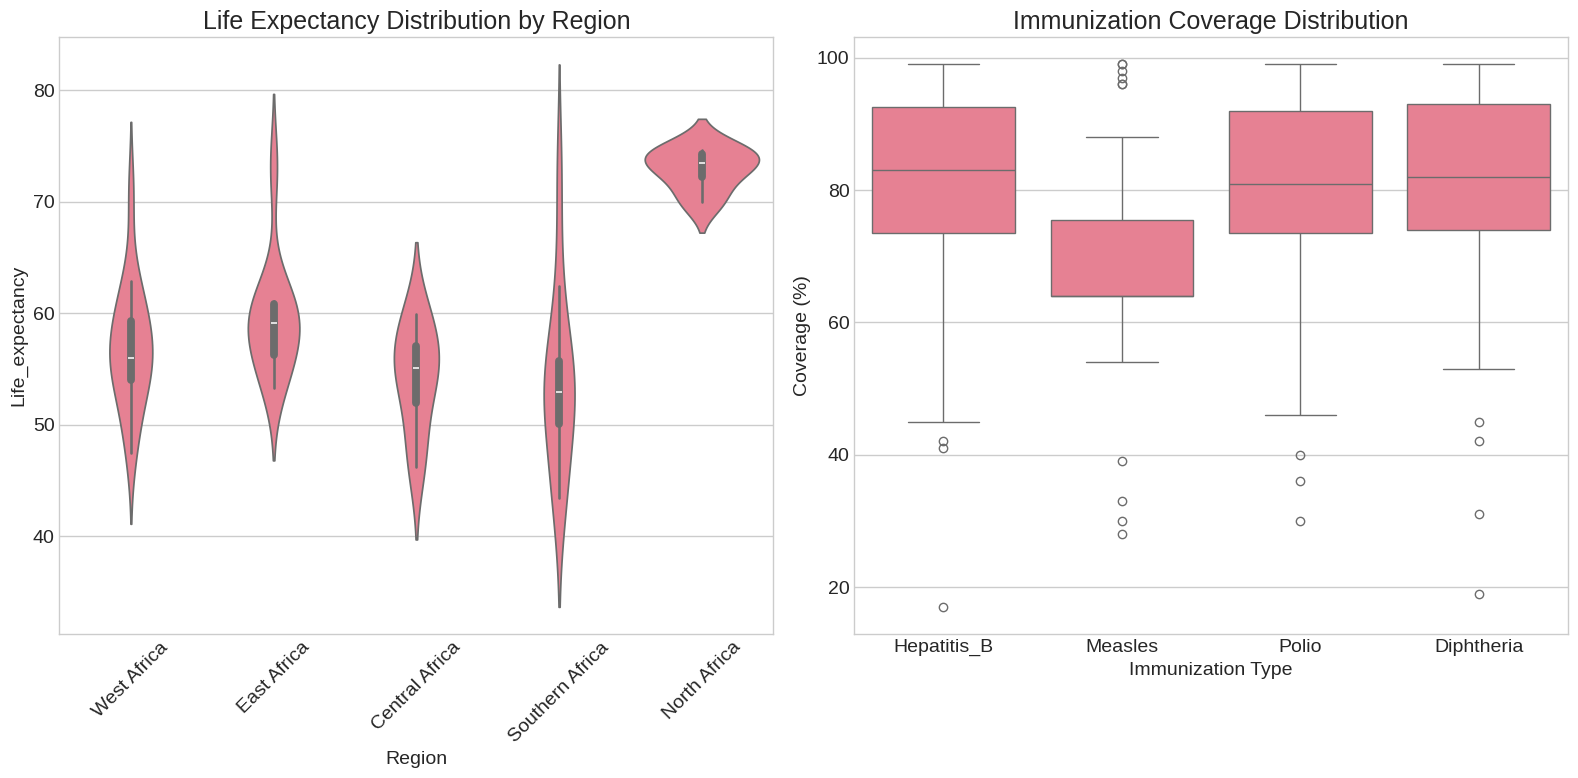

In [16]:
def plot_categorical_analysis(df, save_path=None):
    """Create box plots and other visualizations for categorical variables."""
    # Create figure with multiple subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes = axes.ravel()
    
    # Violin plot for region
    sns.violinplot(data=df, x='Region', y='Life_expectancy', ax=axes[0])
    axes[0].set_title('Life Expectancy Distribution by Region')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Box plot for immunization coverage
    immunizations = ['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']
    immun_data = df[immunizations].melt()
    sns.boxplot(data=immun_data, x='variable', y='value', ax=axes[1])
    axes[1].set_title('Immunization Coverage Distribution')
    axes[1].set_xlabel('Immunization Type')
    axes[1].set_ylabel('Coverage (%)')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300)
        plt.close()
    else:
        plt.show()

plot_categorical_analysis(africa_2008)

The left panel shows the distribution of life expectancy across African regions. **North Africa** has the highest and most concentrated life expectancy, while **Southern Africa** displays very wide variation and lower median value, indicating regional disparities in health outcomes.

The right panel presents boxplots of **immunization coverage** for four vaccines. **Polio** and **Diphtheria** have relatively high median coverage with less variability, while **Measles** shows lower median coverage and greater spread, including several low outliers. This suggests uneven immunization efforts across countries and vaccine types, which may partially explain regional differences in life expectancy.

### 1.3 Variable Selection, Actionability, and Statistical Considerations

Based on the exploratory data analysis, we need to identify the variables to include in our Bayesian linear model for inferring the effects of health indicators on life expectancy. In our discussion, we will address both statistical and practical aspects by considering the following questions:

- Which variables appear most influential and relevant according to your analyses, and what underlying mechanisms might justify their inclusion?
- Reflect on the concept of actionability: To what extent can interventions realistically improve these variables? Consider whether a variable represents a direct target for policy change (for example, immunization rates) versus a more distal or structural factor (such as overall GDP per capita).
- How do potential issues like multicollinearity influence your variable selection? Discuss whether highly correlated variables should be combined, represented by a single measure, or treated separately, and explain your reasoning.


In [60]:
selected_vars = [
       'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Schooling',
]
len(selected_vars)

9

Based on the exploratory data analysis, the selected variables—Under_five_deaths, Adult_mortality, Hepatitis_B, BMI, Polio, Diphtheria, Incidents_HIV, GDP_per_capita, and Schooling—capture both statistically influential relationships with life expectancy and hold practical relevance for public health policy.


The proposed variables balance **direct policy targets** (e.g., immunization, HIV control, education) with broader structural indicators (e.g., GDP, mortality). With minor adjustments for multicollinearity—such as reducing redundancy in mortality variables (removing Infant_deaths).



## 2. Bayesian Linear Regression

Subset the data to 2008 and the variables you have chosen based on your EDA and reasoning. Implement a Bayesian linear regression model to infer the effects of the chosen health indicators on life expectancy.

### 2.1 Mathematical Expression of the Model
Write down the mathematical expression of the model.

The Bayesian linear regression model can be expressed mathematically as follows:

### Likelihood:
$$
y_i \sim N(\alpha + X_i\beta, \sigma^2), \quad i = 1, \dots, n
$$

$$
y_i : \text{Life expectancy (target)}.
$$

$$
X_i : \text{Vector of standardized covariates for observation } i.
$$

$$
 \alpha: \text{Intercept term}.
$$

$$
\beta : \text{Vector of regression coefficients for the covariates}.
$$

$$
\sigma^2 : \text{Variance of the residuals}.
$$


### Priors:
$$
\alpha \sim N(0, 10^2) \\
$$

$$
\beta_j \sim N(0, 5^2), \quad j = 1,\dots,p \\
$$

$$
\sigma \sim \text{Half-Cauchy}(0, 2.5)
$$

### 2.2 Implement the Model in Stan and infer the posterior using MCMC
Implement the Bayesian linear regression model in Stan. Compile the model and sample from the posterior using MCMC.
You will not be judged on the efficiency of the Stan code, but rather on the correctness of the model implementation.

In [61]:
from sklearn.preprocessing import StandardScaler

# Define predictors and target
predictors = selected_vars
target = 'Life_expectancy'
data = africa_2008[['Life_expectancy', *predictors]]

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data[predictors])

stan_data = {
    'N': len(data),
    'K': len(predictors),
    'X': X_standardized,
    'y': data[target].values
}

# Compile Stan Model
model = CmdStanModel(stan_file='stan/bayesian_linear_regression.stan')
# Sample Posterior
fit = model.sample(data=stan_data, chains=4, iter_warmup=1000, iter_sampling=1000, seed=123)

12:04:38 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:04:39 - cmdstanpy - INFO - CmdStan done processing.


### 2.3 Diagnose the Model
Conduct model diagnostics to ensure that the sampler did not encounter any issues during the sampling process. Check for convergence, effective sample size, and goodness of fit.

In [62]:
print(az.summary(idata))

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    57.922  0.165  57.608   58.222      0.003    0.003    3569.0   
beta[0]  -3.408  0.400  -4.114   -2.611      0.008    0.006    2423.0   
beta[1]  -4.912  0.334  -5.549   -4.284      0.007    0.005    2191.0   
beta[2]   0.128  0.880  -1.588    1.735      0.018    0.015    2298.0   
beta[3]   0.229  0.254  -0.259    0.703      0.004    0.004    3335.0   
beta[4]   0.533  0.484  -0.310    1.491      0.009    0.009    3204.0   
beta[5]  -1.018  0.970  -2.771    0.846      0.022    0.016    2009.0   
beta[6]  -0.650  0.278  -1.165   -0.122      0.005    0.004    2824.0   
beta[7]  -0.166  0.315  -0.738    0.433      0.006    0.005    2339.0   
beta[8]   0.564  0.325  -0.066    1.148      0.006    0.005    2513.0   
sigma     1.128  0.129   0.902    1.374      0.003    0.002    2769.0   

         ess_tail  r_hat  
alpha      2428.0    1.0  
beta[0]    3024.0    1.0  
beta[1]    2403.0    1.0  
beta[2]    2467

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    57.918  0.168  57.597   58.218      0.003    0.003    4100.0   
beta[0]  -3.493  0.403  -4.219   -2.711      0.008    0.007    2411.0   
beta[1]  -4.721  0.393  -5.450   -3.963      0.010    0.006    1714.0   
beta[2]   0.506  0.913  -1.290    2.221      0.019    0.015    2292.0   
beta[3]   0.441  0.253  -0.032    0.914      0.005    0.004    2845.0   
beta[4]   0.735  0.521  -0.212    1.719      0.010    0.008    2887.0   
beta[5]  -1.531  1.054  -3.515    0.481      0.024    0.017    2009.0   
beta[6]  -0.739  0.340  -1.411   -0.140      0.007    0.005    2158.0   
beta[7]  -0.046  0.245  -0.495    0.421      0.004    0.004    3064.0   
beta[8]   0.400  0.327  -0.200    1.007      0.007    0.005    2100.0   
sigma     1.153  0.131   0.915    1.393      0.002    0.002    3199.0   

         ess_tail  r_hat  
alpha      2670.0    1.0  
beta[0]    2306.0    1.0  
beta[1]    2201.0    1.0  
beta[2]    2513.0    1.0  
beta[3]    2480.0    1.0  
beta[4]    2826.0    1.0  
beta[5]    2590.0    1.0  
beta[6]    2620.0    1.0  
beta[7]    2493.0    1.0  
beta[8]    2658.0    1.0  
sigma      2312.0    1.0

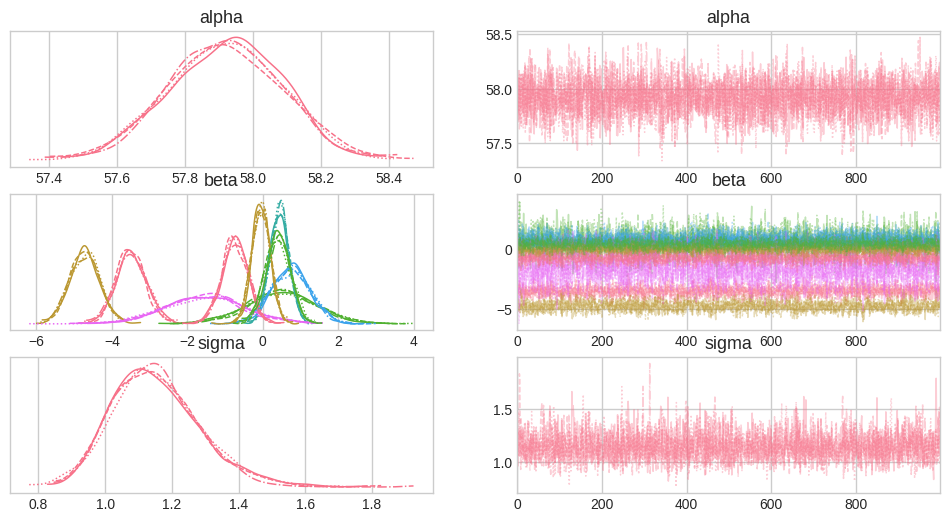

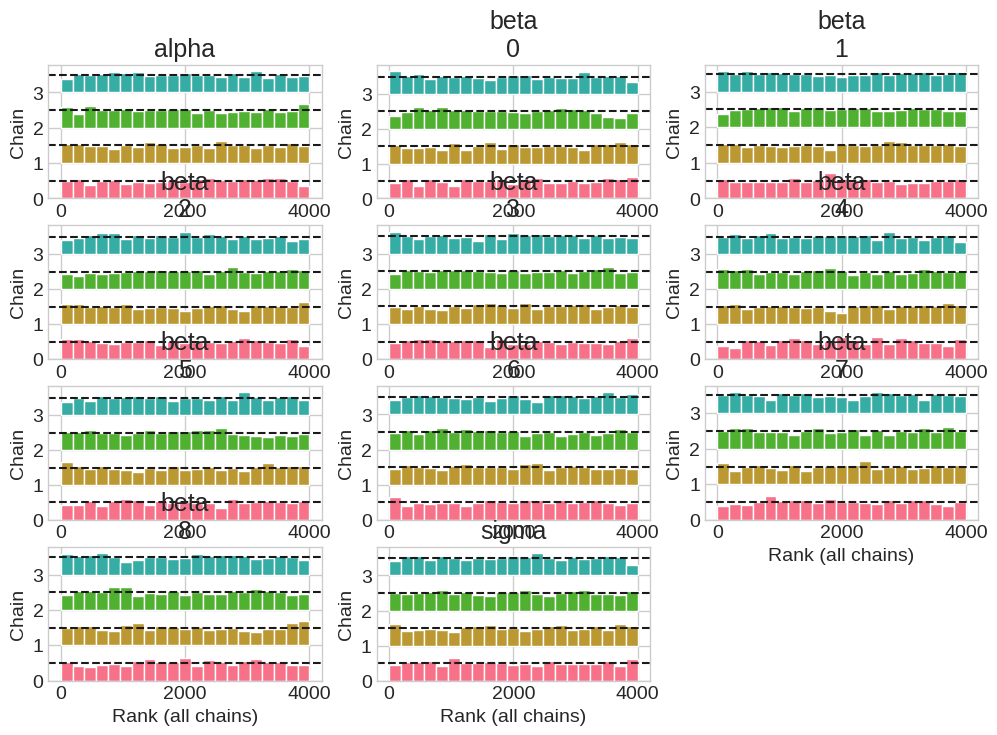

In [63]:
# Convert CmdStanPy output to ArviZ
idata = az.from_cmdstanpy(fit)

# Diagnostics Plots
az.plot_trace(idata)
az.plot_rank(idata, figsize=(12, 8))
# az.plot_autocorr(idata)
az.summary(idata)  # summary includes Rhat, ESS, etc.

The diagnostic output indicates that the model is performing well:

- **Rhat:**  
  All parameters have an Rhat value of 1.0, which strongly suggests that the chains have converged and there is no evidence of convergence issues.

- **Effective Sample Size (ESS):**  
  Both the bulk and tail ESS values are high (ranging roughly from 2000 to 3500), meaning that the posterior samples are sufficiently independent. This high ESS indicates that the sampling is efficient and reliable estimates of the posterior summaries are being obtained.

- **Trace Plots:**  
  Although not shown here directly, the trace plots generated by `az.plot_trace(idata)` would typically be inspected for good mixing of chains. Given the Rhat and ESS diagnostics, we can infer that the trace plots likely display well-mixed, overlapping chains without persistent trends or stickiness.

- **Rank Plots:**  
  The rank plots (from `az.plot_rank(idata)`) help identify any sampling irregularities or potential issues with the posterior geometry. The absence of warnings and the good ESS values suggest that the rank plots show an even distribution of samples, further confirming that there are no problematic areas in the posterior.

In summary, the diagnostic results indicate that the Bayesian linear regression model has converged properly, the chains are mixing well, and the effective sample sizes are robust. This lends confidence to the reliability of the posterior summaries and subsequent inferences.

### 2.4 Summarize and Visualise the Results
Summarise the posterior distribution of the model parameters and provide point estimates and 95% credible intervals for the effects of the chosen health indicators on life expectancy.

In [64]:
# Summarize Posterior Parameters
summary_df = az.summary(idata, hdi_prob=0.95)
summary_df

mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha    57.918  0.168    57.597     58.244      0.003    0.003    4100.0   
beta[0]  -3.493  0.403    -4.246     -2.667      0.008    0.007    2411.0   
beta[1]  -4.721  0.393    -5.543     -3.990      0.010    0.006    1714.0   
beta[2]   0.506  0.913    -1.290      2.366      0.019    0.015    2292.0   
beta[3]   0.441  0.253    -0.034      0.957      0.005    0.004    2845.0   
beta[4]   0.735  0.521    -0.245      1.768      0.010    0.008    2887.0   
beta[5]  -1.531  1.054    -3.516      0.650      0.024    0.017    2009.0   
beta[6]  -0.739  0.340    -1.411     -0.092      0.007    0.005    2158.0   
beta[7]  -0.046  0.245    -0.495      0.458      0.004    0.004    3064.0   
beta[8]   0.400  0.327    -0.222      1.035      0.007    0.005    2100.0   
sigma     1.153  0.131     0.913      1.411      0.002    0.002    3199.0   

         ess_tail  r_hat  
alpha      2670.0    1.0  
beta[0]    2306.0    1.0  
beta[1]    2201.0    1.0  
beta[2]    2513.0    1.0  
beta[3]    2480.0    1.0  
beta[4]    2826.0    1.0  
beta[5]    2590.0    1.0  
beta[6]    2620.0    1.0  
beta[7]    2493.0    1.0  
beta[8]    2658.0    1.0  
sigma      2312.0    1.0

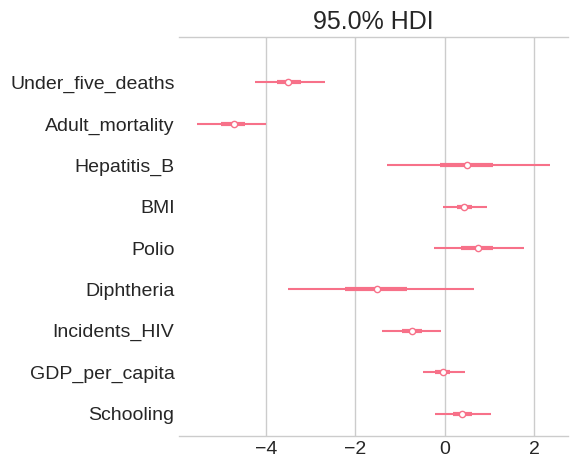

In [65]:
from bayesian_predictions import plot_forest_with_features

# Plot Posterior Intervals

# Create the forest plot with feature names
plot_forest_with_features(idata, selected_vars, var_names=['beta'], hdi_prob=0.95)
# az.plot_forest(idata, var_names=['beta'], combined=True, hdi_prob=0.95)
plt.show()


This forest plot shows the posterior means (points) and 95% highest density intervals (HDIs) for the regression coefficients of selected health indicators on life expectancy.  

- **Under_five_deaths** and **Adult_mortality** have strong negative effects, with narrow HDIs far below zero, indicating high certainty that these variables are associated with lower life expectancy.  
- **Incidents_HIV** also has statistically significant effect (HDIs do not cross zero), with HIV having a negative effect.
- **GDP_per_capita** very low effect.  
- **Diphtheria** shows a strong negative effect on life expectancy, which may seem counterintuitive given its role as a preventive immunization. This effect likely reflects underlying confounding factors—countries with lower life expectancy may be those where diphtheria immunization is more aggressively pursued due to historically poor health infrastructure or higher disease burden. Thus, the negative association may capture broader systemic health challenges rather than the causal impact of the vaccine itself.
- **Schooling** has a modest but meaningful positive effect with its HDI just above zero.  
- **Polio**, **BMI**, and **Hepatitis_B** show positive point estimates, with intervals include zero for **Hepatitis_B**, indicating uncertainty about the direction or significance of its effect.

Overall, the plot highlights a few key drivers of life expectancy with high confidence while indicating where evidence is weaker or inconclusive.

In [66]:
from bayesian_predictions import get_posterior_samples, predict_mean, predict_distribution, summarize_predictions


# Get posterior parameters
posterior_params = get_posterior_samples(fit)

# Test on all other years

# Make predictions for all other years
df_test = africa[africa['Year'] != 2008]

X_test_standardized = scaler.transform(df_test[predictors]) # Standardize new data using same scaler as training data
y_test = df_test['Life_expectancy'].values

# Get mean predictions with uncertainty intervals
mean_predictions, (ci_lower, ci_upper) = predict_mean(X_test_standardized, posterior_params)

# Or get full predictive distribution
pred_samples = predict_distribution(X_test_standardized, posterior_params)

rmse = np.sqrt(np.mean((mean_predictions - y_test) ** 2))
print("RMSE: ", rmse)

# Summarize predictions
summary = summarize_predictions(pred_samples, actual=y_test)
summary


RMSE:  1.4279434144340524
95% CI Coverage: 94.64%


Mean_Prediction  Std_Prediction    CI_2.5%   CI_97.5%  Actual     Error  \
0          60.755231        1.225841  58.367024  63.065807    60.7 -0.055231   
1          64.304130        1.220474  61.881578  66.632788    62.9 -1.404130   
2          63.169598        1.253529  60.750085  65.642669    61.4 -1.769598   
3          54.484432        1.700943  51.280369  57.744366    53.8 -0.684432   
4          63.474897        1.263662  60.945549  65.943155    63.8  0.325103   
..               ...             ...        ...        ...     ...       ...   
760        71.121320        1.236003  68.646885  73.401912    72.7  1.578680   
761        53.121710        1.491825  50.197378  55.958961    54.1  0.978290   
762        47.618396        1.338627  45.005516  50.095001    50.1  2.481604   
763        53.470964        1.258562  51.058229  55.867090    51.8 -1.670964   
764        48.416058        2.357290  43.844750  53.164323    49.9  1.483942   

     Abs_Error  In_CI  
0     0.055231   True  
1     1.404130   True  
2     1.769598   True  
3     0.684432   True  
4     0.325103   True  
..         ...    ...  
760   1.578680   True  
761   0.978290   True  
762   2.481604  False  
763   1.670964   True  
764   1.483942   True  

[765 rows x 8 columns]

### 2.6 Interpret the Results
Interpret the results of the Bayesian linear regression model in the context of the research question. Discuss the magnitude and direction of the effects of the chosen health indicators on life expectancy.

The Bayesian linear regression model provides insightful evidence on how key health and socioeconomic indicators influence life expectancy across African countries. The model achieves a **Root Mean Square Error (RMSE) of 1.43** of the test data (all data except 2008), indicating high predictive accuracy. Additionally, the **95% credible interval (CI) coverage is 94.64%**, showing well-calibrated uncertainty estimates and strong posterior credibility.

**Key Findings:**

- **Under_five_deaths** and **Adult_mortality** exhibit large **negative effects** on life expectancy, with narrow 95% credible intervals well below zero. These are the most impactful predictors, suggesting that reducing early childhood and adult mortality rates is crucial to improving population longevity.

- **Incidents_HIV** also has a **negative and statistically significant** effect, highlighting the ongoing burden of HIV on life expectancy, especially in countries with high prevalence.

- **GDP_per_capita** and **Schooling** show **positive effects**, indicating that higher economic development and educational attainment are associated with longer life expectancy. These findings align with existing literature on the role of socioeconomic status in health outcomes.

- While **Hepatitis_B**, **Polio**, and **BMI** have positive point estimates, their credible intervals include zero, suggesting uncertainty in their effects or variability across countries. **Diphtheria**, on the other hand, shows a strong negative association with life expectancy. This counterintuitive result likely reflects confounding—countries facing greater health system challenges may prioritize Diphtheria immunization, making the negative effect a signal of broader underlying health vulnerabilities rather than the vaccine’s impact itself.


**Conclusion:**

The model identifies both **direct health risks** (e.g., mortality and HIV) and **structural determinants** (e.g., schooling) as influential drivers of life expectancy. These findings provide actionable insight for policy: interventions targeting child and adult mortality, vaccination compains, improving education, and sustaining economic growth are likely to yield the most substantial gains in life expectancy.


## Recommendations

The overnment is interested in improving life expectancy. They inform you that they have a limited budget and can only focus on a few health indicators. Based on your analysis, what recommendations would you give to the government? What are the potential benefits of focusing on these health indicators? Provide evidence to support your recommendations.

The government has been able to provide you with the latest statistics on each of the indicators. They want you to use this information to:

1. Predict the life expectancy, which has not been measured yet.
2. Visualize the life expectancy predictions by changing the values of each health indicator you have chose by 10%. Note that for some indicators a increase in value is good for life expectancy, while for others a decrease is good.

In [67]:
from bayesian_predictions import get_posterior_samples, predict_mean, predict_distribution, summarize_predictions

new_data_dict = {
    'Adult_mortality': 263.6,
    'Alcohol_consumption': 3.0,
    'BMI': 23.8,
    'Diphtheria': 80.9,
    'Economy_status_Developed': 0.0,
    'Economy_status_Developing': 1.0,
    'GDP_per_capita': 2705,
    'Hepatitis_B': 81.5,
    'Incidents_HIV': 1.8,
    'Infant_deaths': 47.6,
    'Measles': 69.5,
    'Polio': 81.1,
    'Population_mln': 22.1,
    'Schooling': 5.3,
    'Thinness_five_nine_years': 6.6,
    'Thinness_ten_nineteen_years': 6.7,
    'Under_five_deaths': 68.8
}


# Make predictions for new data
new_data_dict = {k: [v] for k, v in new_data_dict.items()}
inputs = pd.DataFrame(new_data_dict)[predictors]
X_new_standardized = scaler.transform(inputs) # Standardize new data using same scaler as training data

# Get mean predictions with uncertainty intervals
mean_predictions, (ci_lower, ci_upper) = predict_mean(X_new_standardized, posterior_params)

# Or get full predictive distribution
pred_samples = predict_distribution(X_new_standardized, posterior_params)

print("mean prediction: ", mean_predictions)
print("ci_lower: ", ci_lower)
print("ci_upper: ", ci_upper)


mean prediction:  [62.37794361]
ci_lower:  [61.92001499]
ci_upper:  [62.83028616]


The base life expectancy prediction for the given input is approximately **62.4 years**; well-targeted interventions could push this meaningfully higher.

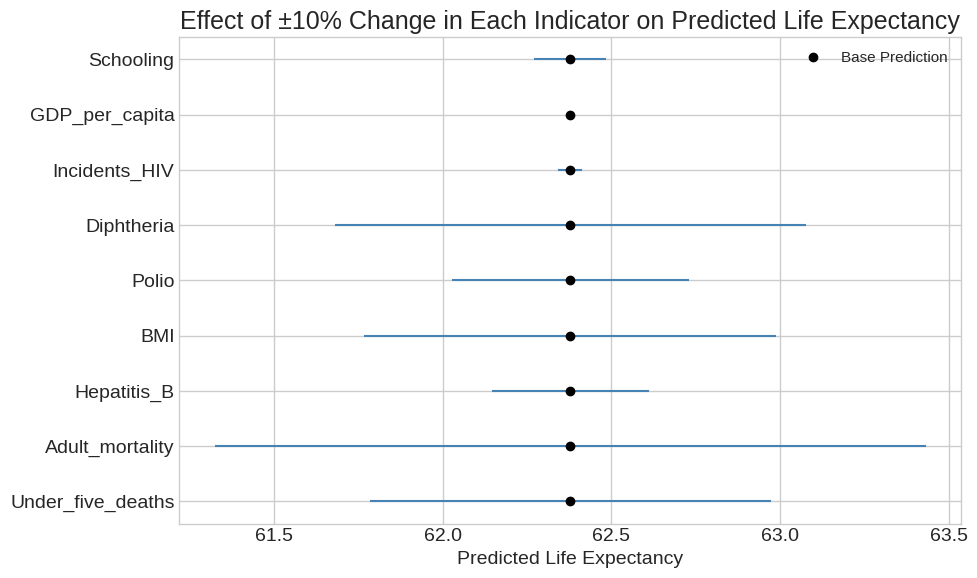

In [68]:
# List of selected predictors
selected_predictors = predictors  # already defined as your model input features

# Store results
results = []

for var in selected_predictors:
    # Create copies of the input
    increased_input = inputs.copy()
    decreased_input = inputs.copy()

    # Apply +10% and -10% changes
    increased_input[var] = increased_input[var] * 1.10
    decreased_input[var] = decreased_input[var] * 0.90

    # Standardize both
    X_increased = scaler.transform(increased_input)
    X_decreased = scaler.transform(decreased_input)

    # Predict
    pred_inc = predict_mean(X_increased, posterior_params)[0][0]
    pred_dec = predict_mean(X_decreased, posterior_params)[0][0]

    # Store results
    results.append({
        'Variable': var,
        'Pred_Lower': pred_dec,
        'Base': mean_predictions[0],
        'Pred_Upper': pred_inc
    })

# Convert to DataFrame for plotting
pred_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))
plt.hlines(pred_df['Variable'], pred_df['Pred_Lower'], pred_df['Pred_Upper'], color='steelblue')
plt.plot(pred_df['Base'], pred_df['Variable'], 'o', label='Base Prediction', color='black')
plt.xlabel("Predicted Life Expectancy")
plt.title("Effect of ±10% Change in Each Indicator on Predicted Life Expectancy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Recommendations to Improve Life Expectancy

Based on the Bayesian linear regression model and the simulation of ±10% changes in health indicators, we offer the following evidence-based recommendations for your government, given the constraint of limited resources:


### **1. Focus on Reducing Adult Mortality and Under-Five Deaths**

These two indicators have the **strongest negative association** on life expectancy, both in terms of statistical significance and predicted effect size:

- A **10% reduction in Adult Mortality** results in the largest gain in predicted life expectancy.
- Similarly, reducing **Under-Five Deaths** substantially improves life expectancy.


### **2. Invest in Education and HIV Prevention**

- **Schooling** has a modest but **consistent positive effect**. Enhancing education, is likely to improve health literacy and long-term population health.
- **Incidents_HIV** shows a negative effect. Efforts to reduce HIV incidence—such as education campaigns, access to antiretrovirals, and testing—are effective and actionable.


### **3. Support Vaccination**

- Vaccinations remain **preventive and cost-effective**; in resource-limited settings, prioritizing vaccines with high disease burden may have a big impact.



### Summary of Simulation Insights

As shown in the figure:
- **Reducing Adult Mortality and Under-Five Deaths by 10%** gives the **largest predicted increase** in life expectancy.
- **Increasing Schooling or reducing HIV incidence** also results in measurable gains.



## Extending the linear model

So far we have only worked with data from a single year. How would you improve/reformulate the model to include data from all years? and/or account for non linearity in the relationship between the health indicators and life expectancy? Implement your ideas, summarise the results, and provide a discussion. You will be assessed based on the following criteria:

- The ability to provide a clear mathematical expression of the model and justify the modeling choices.
- The ability to correctly implement the model in Stan.
- The ability to extract estimates from the model to create figures and tables that answer the research question.

Note: If you choose to do a longitudinal analysis, you may need to subset the data to a smaller number of countries as an analysis of all countries may be computationally intensive.

### A slight first modification
Using Log transformed GDP per capita and Log transformed Incidents_HIV


In [69]:
selected_vars = [
       'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 
       'BMI', 'Polio', 'Diphtheria', 'Log_Incidents_HIV', 'Log_GDP_per_capita', 'Schooling',
]

predictors = selected_vars
target = 'Life_expectancy'
data = africa_2008[['Life_expectancy', *predictors]]

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data[predictors])

stan_data = {
    'N': len(data),
    'K': len(predictors),
    'X': X_standardized,
    'y': data[target].values
}

model = CmdStanModel(stan_file='stan/bayesian_linear_regression.stan')
fit = model.sample(data=stan_data, chains=4, iter_warmup=1000, iter_sampling=1000, seed=123)


12:24:45 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:24:46 - cmdstanpy - INFO - CmdStan done processing.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    57.922  0.165  57.608   58.222      0.003    0.003    3569.0   
beta[0]  -3.408  0.400  -4.114   -2.611      0.008    0.006    2423.0   
beta[1]  -4.912  0.334  -5.549   -4.284      0.007    0.005    2191.0   
beta[2]   0.128  0.880  -1.588    1.735      0.018    0.015    2298.0   
beta[3]   0.229  0.254  -0.259    0.703      0.004    0.004    3335.0   
beta[4]   0.533  0.484  -0.310    1.491      0.009    0.009    3204.0   
beta[5]  -1.018  0.970  -2.771    0.846      0.022    0.016    2009.0   
beta[6]  -0.650  0.278  -1.165   -0.122      0.005    0.004    2824.0   
beta[7]  -0.166  0.315  -0.738    0.433      0.006    0.005    2339.0   
beta[8]   0.564  0.325  -0.066    1.148      0.006    0.005    2513.0   
sigma     1.128  0.129   0.902    1.374      0.003    0.002    2769.0   

         ess_tail  r_hat  
alpha      2428.0    1.0  
beta[0]    3024.0    1.0  
beta[1]    2403.0    1.0  
beta[2]    2467.0    1.0  
beta[3]    2842.0    1.0  
beta[4]    2458.0    1.0  
beta[5]    2069.0    1.0  
beta[6]    2944.0    1.0  
beta[7]    2598.0    1.0  
beta[8]    2452.0    1.0  
sigma      2718.0    1.0

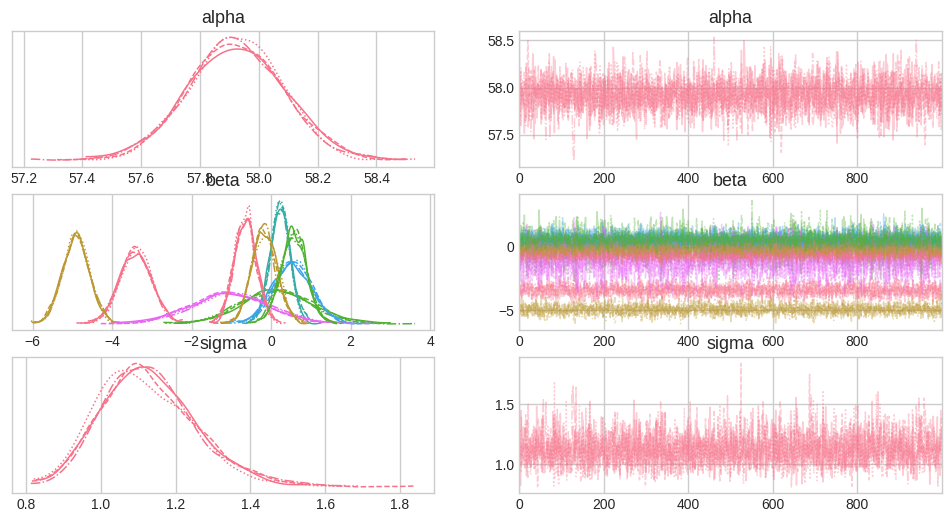

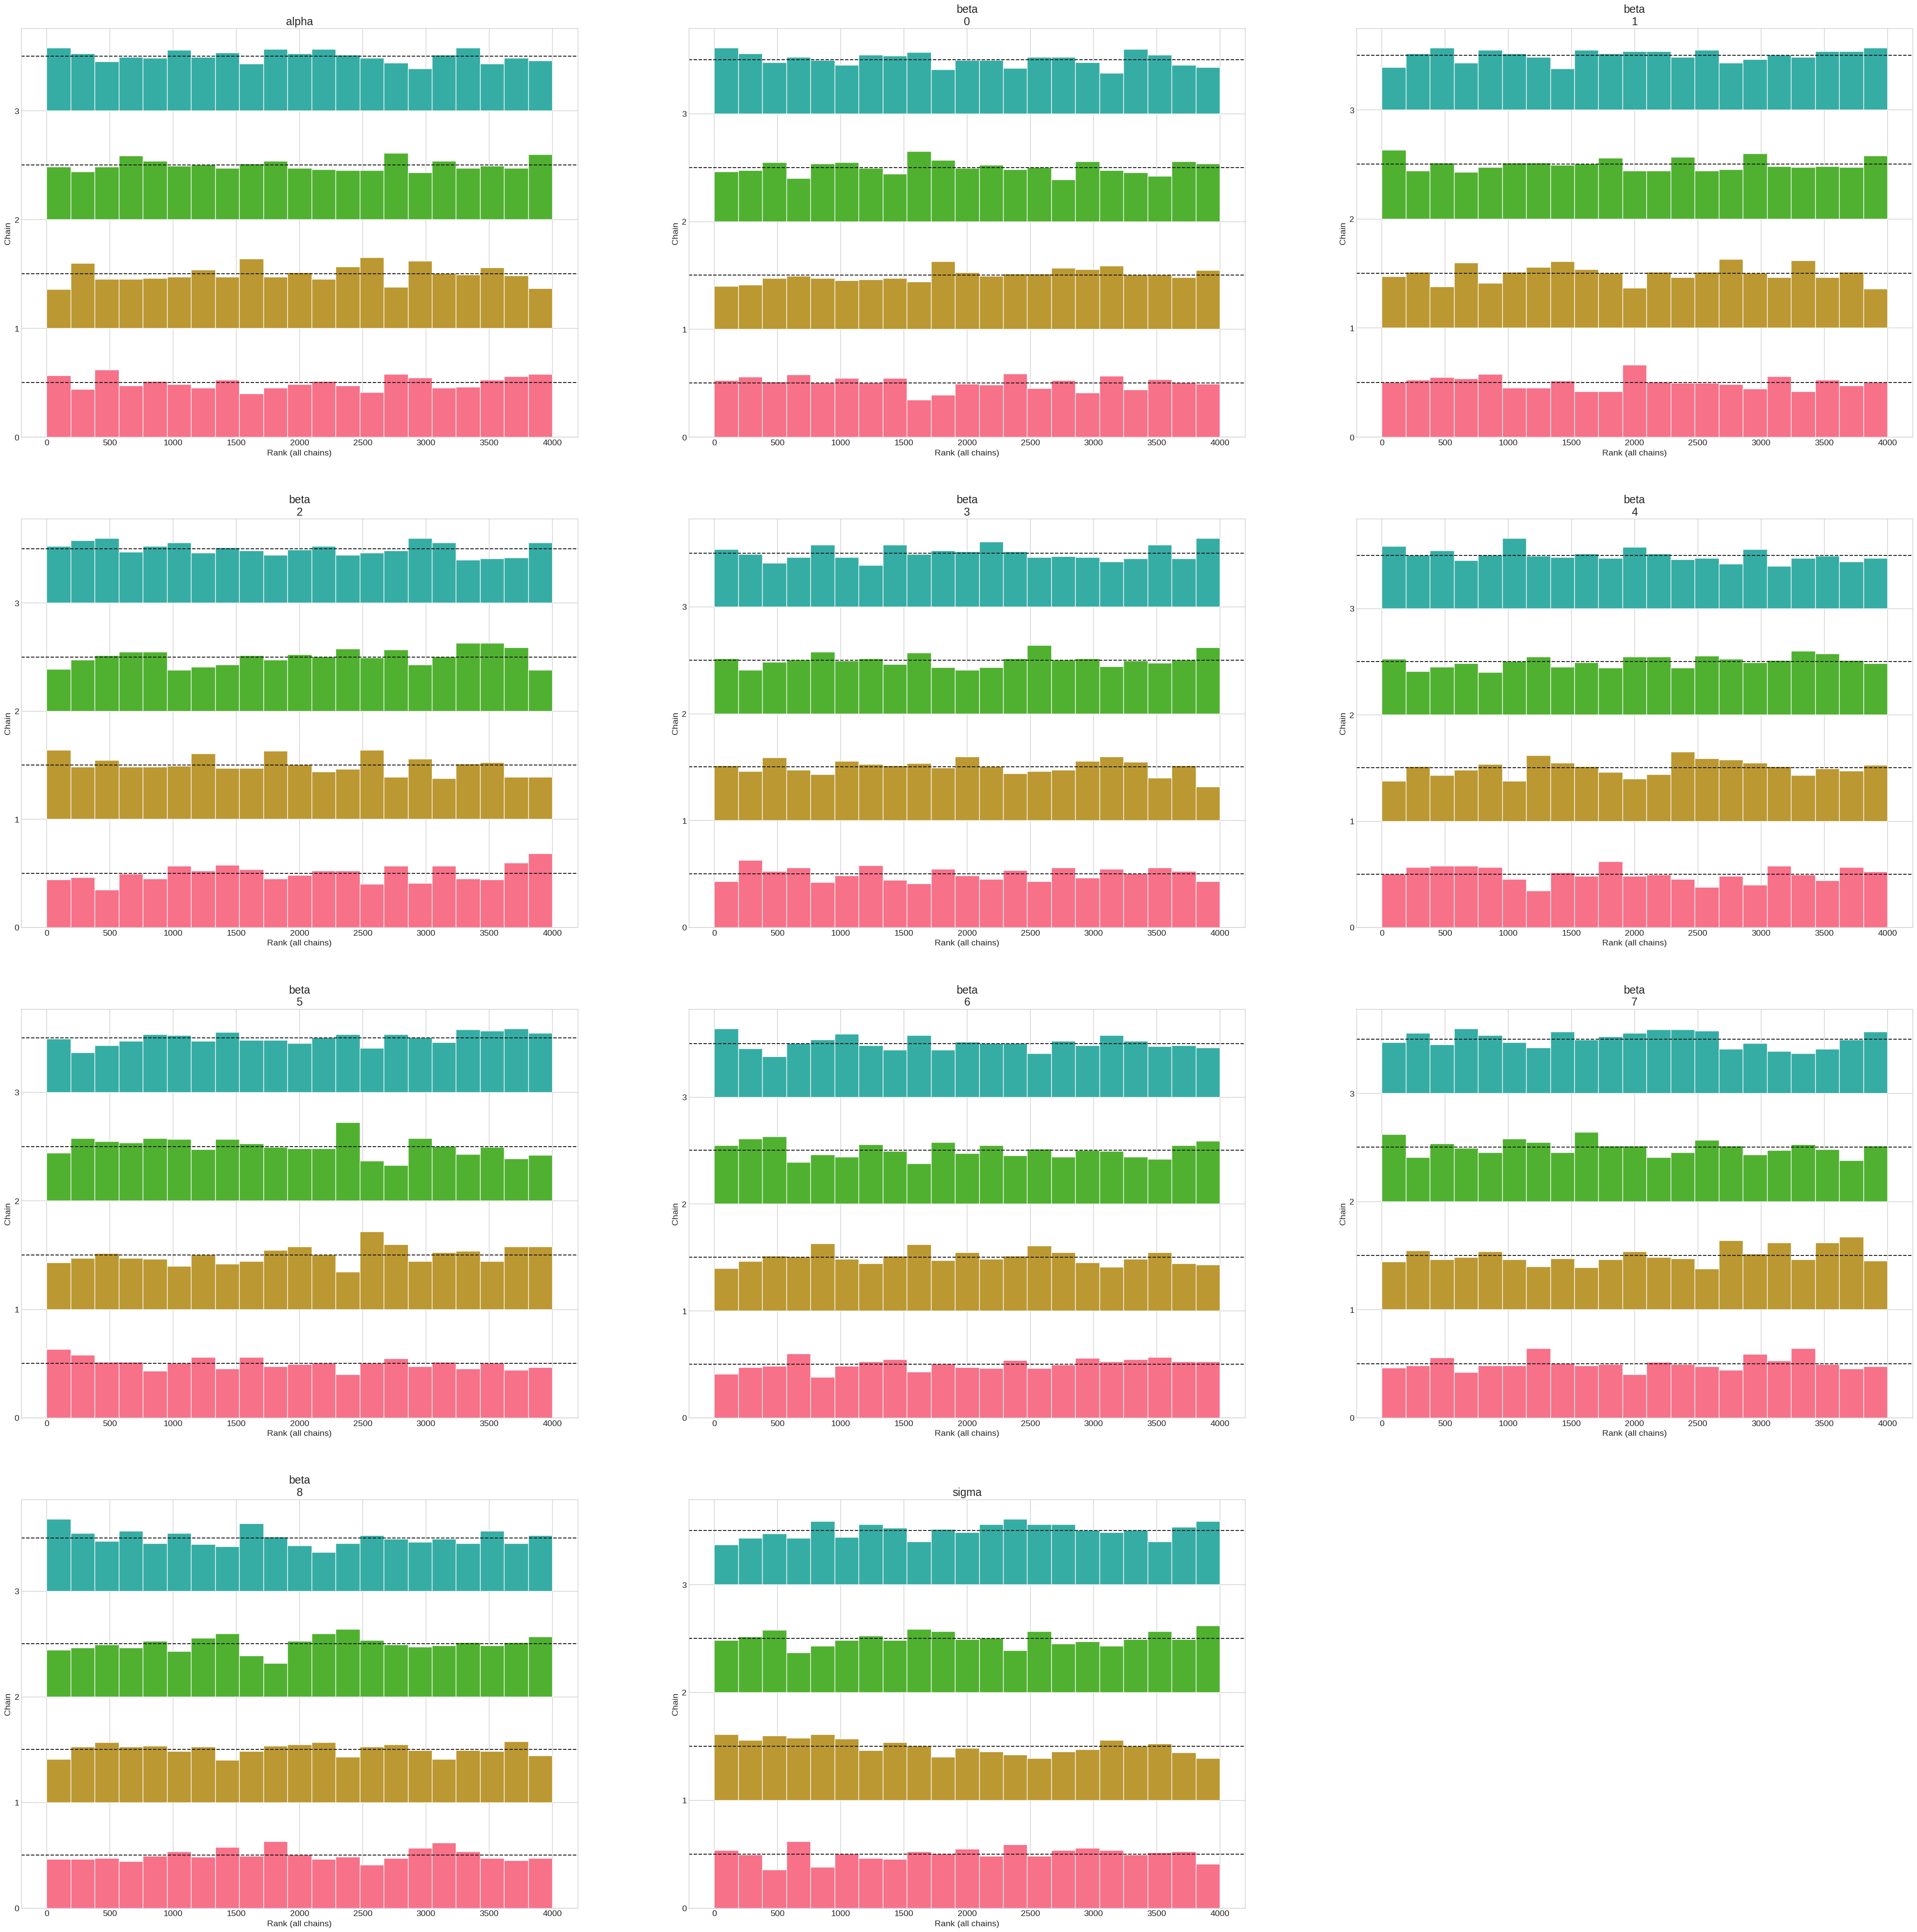

In [70]:
# Convert CmdStanPy output to ArviZ
idata = az.from_cmdstanpy(fit)

# Diagnostics Plots
az.plot_trace(idata)
az.plot_rank(idata)
# az.plot_autocorr(idata)
az.summary(idata)  # summary includes Rhat, ESS, etc.

In [71]:
africa['Log_GDP_per_capita'] = np.log(africa['GDP_per_capita'])
africa['Log_Incidents_HIV'] = np.log(africa['Incidents_HIV'])

In [72]:
inputs# Get posterior parameters
posterior_params = get_posterior_samples(fit)

# Test on all other years

# Make predictions for all other years
df_test = africa[africa['Year'] != 2008]

X_test_standardized = scaler.transform(df_test[predictors]) # Standardize new data using same scaler as training data
y_test = df_test['Life_expectancy'].values

# Get mean predictions with uncertainty intervals
mean_predictions, (ci_lower, ci_upper) = predict_mean(X_test_standardized, posterior_params)

# Or get full predictive distribution
pred_samples = predict_distribution(X_test_standardized, posterior_params)

rmse = np.sqrt(np.mean((mean_predictions - y_test) ** 2))
print("RMSE: ", rmse)

# # Summarize predictions
summary = summarize_predictions(pred_samples, actual=y_test)
summary

RMSE:  1.3057875950513447
95% CI Coverage: 93.99%


Mean_Prediction  Std_Prediction    CI_2.5%   CI_97.5%  Actual     Error  \
0          61.654105        1.269548  58.959470  64.132677    60.7 -0.954105   
1          63.761434        1.174333  61.440245  66.199165    62.9 -0.861434   
2          62.961299        1.176790  60.765217  65.273346    61.4 -1.561299   
3          53.817386        1.629569  50.536424  57.117348    53.8 -0.017386   
4          64.357093        1.237473  62.039710  66.781494    63.8 -0.557093   
..               ...             ...        ...        ...     ...       ...   
760        70.600412        1.226270  68.196887  73.115774    72.7  2.099588   
761        53.241686        1.331423  50.599642  55.729356    54.1  0.858314   
762        47.705216        1.286768  45.130238  50.272651    50.1  2.394784   
763        53.350775        1.214149  51.074595  55.675902    51.8 -1.550775   
764        48.081957        2.168632  43.630929  52.228644    49.9  1.818043   

     Abs_Error  In_CI  
0     0.954105   True  
1     0.861434   True  
2     1.561299   True  
3     0.017386   True  
4     0.557093   True  
..         ...    ...  
760   2.099588   True  
761   0.858314   True  
762   2.394784   True  
763   1.550775   True  
764   1.818043   True  

[765 rows x 8 columns]

We observed the same nice convergence properties with a slight improvement in **RMSE**, it becomes approximatly `1.306 years`.

### Longitudinal Model

We extend the Bayesian linear model to a hierarchical Bayesian linear regression (random-intercept model), which captures longitudinal data from multiple years and accounts for baseline differences across countries. Additionally, It incorporates the year information (e.g., modeling a linear time-trend in life expectancy). The life expectancy $ y_{ijt} $ for country $ j $, observation $ i $, and year $ t $ is modeled as:

**Likelihood**:

$$
y_{ijt} \sim N(\alpha + u_j + \gamma \cdot \text{year}_{t} + X_{ijt}\beta,\, \sigma^2), \quad u_j \sim N(0, \sigma_u^2)
$$

Where:

- $y_{ijt}$: Life expectancy for observation $i$, country $j$, at year $t$.
- $\alpha$: Global intercept.
- $u_j$: Country-specific random intercept.
- $\gamma$: Fixed effect of the year (captures global linear temporal trend).
- $\text{year}_t$: Year variable (standardized or centered).
- $X_{ijt}$: Health indicators (standardized predictors).
- $\beta$: Regression coefficients (fixed effects).
- $\sigma^2$: Residual variance.
- $\sigma_u^2$: Variance of random intercepts.

**Justification**:

- Random intercepts effectively handle repeated measurements, capturing variability within and between countries.
- Including year explicitly models global trends over time, accounting for improvements or declines in life expectancy globally.
- Standardizing predictors improves interpretability and numerical stability of inference.

In [76]:
# Optionally subset countries to reduce computational load
selected_countries = africa['Country'].unique() #[:30]
df_subset = africa[africa['Country'].isin(selected_countries)].reset_index(drop=True)

# Standardize the year variable
df_subset['year_std'] = (df_subset['Year'] - df_subset['Year'].mean()) / df_subset['Year'].std()

# Country indexing, results in dim mismatch
country_codes = sorted(df_subset['Country'].unique().tolist())
country_to_idx = {country: i+1 for i, country in enumerate(country_codes)}
df_subset['country_indices'] = df_subset['Country'].map(country_to_idx)

# country_codes, country_indices = np.unique(df_subset['Country'], return_inverse=True)

df_train = df_subset[df_subset['Year'] < 2014].reset_index(drop=True)
country_indices_train = df_train['country_indices']
df_test = df_subset[df_subset['Year'] >= 2014].reset_index(drop=True)
country_indices_test = df_test['country_indices']


selected_vars = [
       'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 
       'BMI', 'Polio', 'Diphtheria', 'Log_Incidents_HIV', 'Log_GDP_per_capita', 'Schooling',
]

predictors = selected_vars
target = 'Life_expectancy'

# Standardize predictors
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_train[predictors])
X_test_standardized = scaler.transform(df_test[predictors])

y_test = df_test[target].values

stan_data = {
    'N': len(df_train),
    'J': len(country_codes),
    'K': len(predictors),
    'country': country_indices_train,
    'year': df_train['year_std'].values,
    'X': X_standardized,
    'y': df_train[target].values
}

# Compile and sample from model
model = CmdStanModel(stan_file='stan/longitudinal_year_model.stan')
fit = model.sample(data=stan_data, chains=4, iter_sampling=1000, iter_warmup=1000, seed=123)

12:47:32 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:47:46 - cmdstanpy - INFO - CmdStan done processing.


In [77]:
# Convert CmdStanPy output to ArviZ
idata = az.from_cmdstanpy(fit)

/home/oussama/Desktop/repos/ml4ph/.venv/lib/python3.12/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (64) in plot_rank, generating only 40 plots
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    57.218  0.194  56.865   57.589      0.009    0.005     505.0   
gamma     0.074  0.074  -0.065    0.211      0.003    0.002     689.0   
beta[0]  -2.667  0.125  -2.911   -2.435      0.004    0.002    1150.0   
beta[1]  -4.620  0.107  -4.817   -4.420      0.003    0.002    1526.0   
beta[2]   0.061  0.078  -0.084    0.205      0.002    0.001    2063.0   
...         ...    ...     ...      ...        ...      ...       ...   
u[48]     0.619  0.335  -0.005    1.271      0.013    0.007     652.0   
u[49]     0.455  0.373  -0.246    1.143      0.014    0.008     737.0   
u[50]     0.101  0.381  -0.622    0.795      0.013    0.009     833.0   
sigma     0.624  0.017   0.591    0.657      0.000    0.000    2248.0   
sigma_u   1.438  0.182   1.107    1.779      0.005    0.004    1118.0   

         ess_tail  r_hat  
alpha       747.0   1.01  
gamma      1151.0   1.00  
beta[0]    1526.0   1.01  
beta[1]    1727.0   1.00  
beta[2]    2212.0   1.00  
...           ...    ...  
u[48]      1151.0   1.01  
u[49]      1284.0   1.01  
u[50]      1310.0   1.01  
sigma      2298.0   1.00  
sigma_u    1895.0   1.00  

[64 rows x 9 columns]

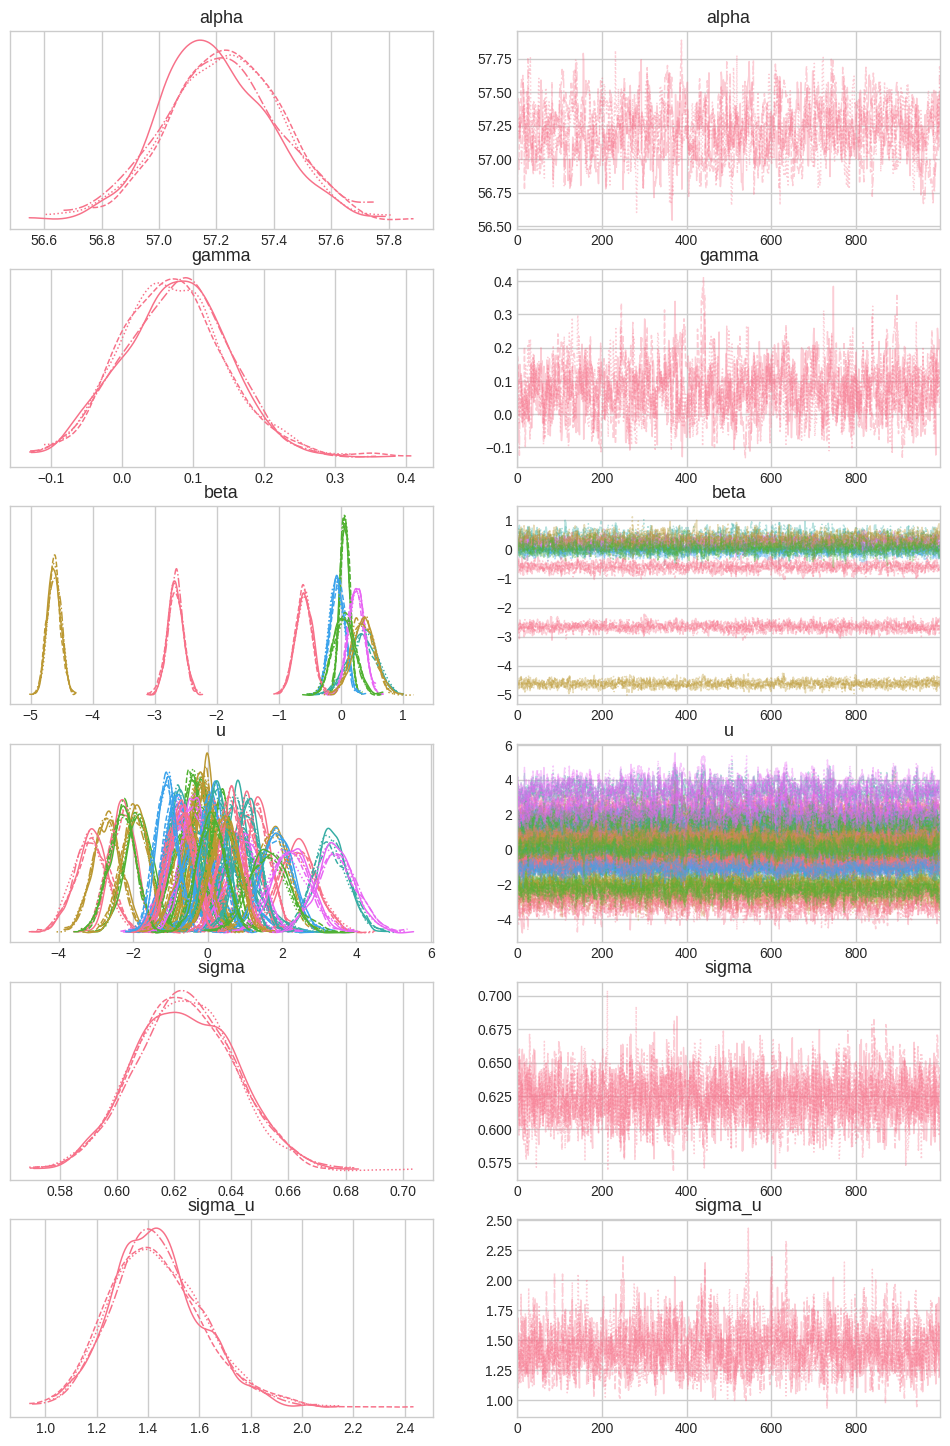

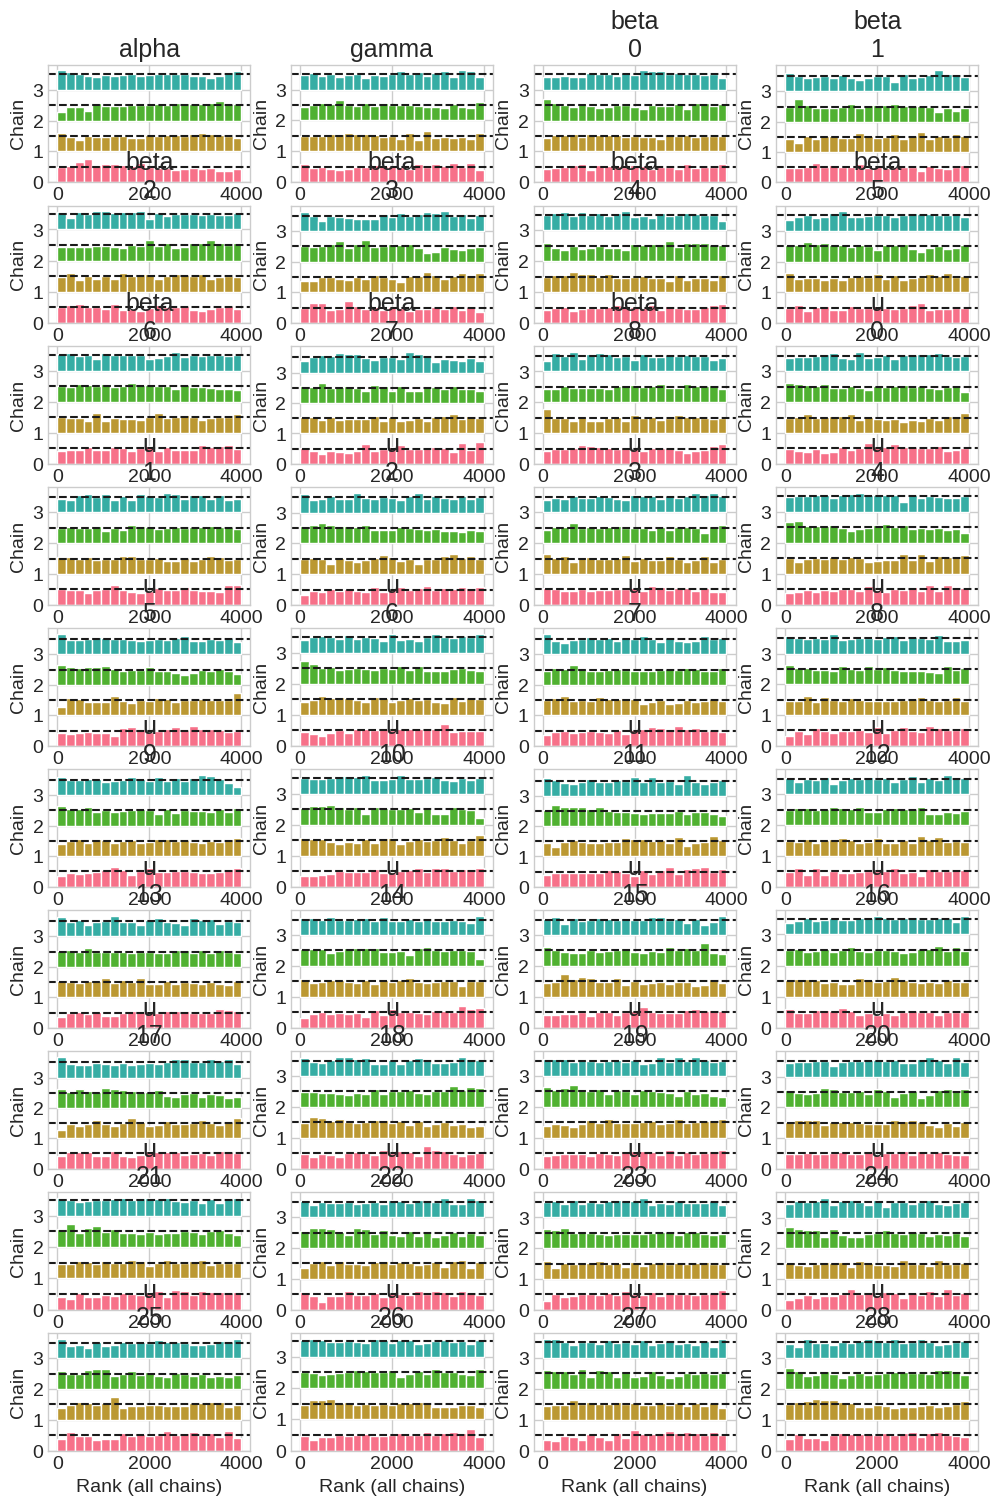

In [78]:
# Diagnostics Plots
figsize=(12, 18)
var_names = ['alpha', 'gamma', 'beta', 'u', 'sigma', 'sigma_u']
az.plot_trace(idata, var_names=var_names, figsize=figsize)
az.plot_rank(idata, var_names=var_names, figsize=figsize)
# az.plot_autocorr(idata)
az.summary(idata, var_names=var_names)  # summary includes Rhat, ESS, etc.

In [32]:
from bayesian_predictions import get_posterior_samples_longitudinal

posterior_params = get_posterior_samples_longitudinal(fit)
posterior_params.keys()

dict_keys(['alpha', 'gamma', 'beta', 'u', 'sigma', 'sigma_u'])

In [33]:
from bayesian_predictions import predict_longitudinal

pred_samples, mean_predictions, (ci_lower, ci_upper) = predict_longitudinal(
    X_test_standardized, country_indices_test, df_test['year_std'].values, posterior_params)
rmse = np.sqrt(np.mean((mean_predictions - y_test) ** 2))
print("RMSE: ", rmse)

# Summarize predictions
summary = summarize_predictions(pred_samples, actual=y_test)
summary



RMSE:  0.9545894322787573
95% CI Coverage: 82.35%


Mean_Prediction  Std_Prediction    CI_2.5%   CI_97.5%  Actual     Error  \
0          57.667180        0.634650  56.530213  58.992568    57.6 -0.067180   
1          61.303587        0.651050  60.065173  62.531844    60.9 -0.403587   
2          74.612629        0.664613  73.342635  75.899623    76.1  1.487371   
3          64.206766        0.661495  62.962814  65.544851    65.5  1.293234   
4          59.619359        0.657717  58.311020  60.859575    60.8  1.180641   
..               ...             ...        ...        ...     ...       ...   
97         54.919968        0.673721  53.627681  56.214080    55.5  0.580032   
98         64.666901        0.647619  63.379603  65.931512    65.0  0.333099   
99         62.326384        0.672655  60.960198  63.627470    62.6  0.273616   
100        75.326211        0.671762  74.017450  76.646619    75.9  0.573789   
101        62.551017        0.686089  61.257081  63.928043    64.1  1.548983   

     Abs_Error  In_CI  
0     0.067180   True  
1     0.403587   True  
2     1.487371  False  
3     1.293234   True  
4     1.180641   True  
..         ...    ...  
97    0.580032   True  
98    0.333099   True  
99    0.273616   True  
100   0.573789   True  
101   1.548983  False  

[102 rows x 8 columns]

This model also shows nice convergence results and achieves a **Root Mean Square Error (RMSE) of 0.95** of the test data (2014 and 2015), indicating high predictive accuracy. Additionally, the **95% credible interval (CI) coverage is 82.35%**, showing relatively well-calibrated uncertainty estimates and strong posterior credibility.


### Just me trying a multi-dimentional GP with additive SE kernels

In [35]:
# Optionally subset countries to reduce computational load
# selected_countries = africa['Country'].unique() # [:30]
selected_countries = ['Morocco', 'Kenya', 'Nigeria', 'South Africa', 'Uganda']
df_subset = africa[africa['Country'].isin(selected_countries)].reset_index(drop=True)

# Standardize the year variable
df_subset['year_std'] = (df_subset['Year'] - df_subset['Year'].mean()) / df_subset['Year'].std()

# Create country indexing
country_codes = sorted(df_subset['Country'].unique().tolist())
country_to_idx = {country: i+1 for i, country in enumerate(country_codes)}
df_subset['country_indices'] = df_subset['Country'].map(country_to_idx)

# Split data into training and test sets
df_train = df_subset[df_subset['Year'] < 2014].reset_index(drop=True)
country_indices_train = df_train['country_indices']
df_test = df_subset[df_subset['Year'] >= 2014].reset_index(drop=True)
country_indices_test = df_test['country_indices']

# Select predictors and target
selected_vars = [
    'Under_five_deaths', 'Adult_mortality', 'Hepatitis_B', 
    'BMI', 'Polio', 'Diphtheria', 'Log_Incidents_HIV', 'Log_GDP_per_capita', 'Schooling'
]
predictors = selected_vars
target = 'Life_expectancy'

# Standardize predictors (note: year is already standardized)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_train[predictors])
X_test_standardized = scaler.transform(df_test[predictors])

y_test = df_test[target].values

# Prepare data for Stan, including new GP-specific entries:
stan_data = {
    'N': len(df_train),
    'J': len(country_codes),
    'K': len(predictors),
    'country': country_indices_train.tolist(),  # Stan expects a list of ints
    'year': df_train['year_std'].values,
    'X': X_standardized,
    'y': df_train[target].values,
    'C': 1.0,   # Constant for GP domain boundary scaling (adjust if necessary)
    'M': 10     # Number of basis functions per GP dimension (tweak based on complexity)
}

# Compile and sample from the new model (ensure the Stan file corresponds to the additive HSGP model)
from cmdstanpy import CmdStanModel
model = CmdStanModel(stan_file='stan/multi_dim_hsgp_regression.stan')
fit = model.sample(data=stan_data, chains=4, iter_sampling=1000, iter_warmup=1000, seed=123)



09:34:41 - cmdstanpy - INFO - compiling stan file /home/oussama/Desktop/repos/ml4ph/src/ml4ph/stan/multi_dim_hsgp_regression.stan to exe file /home/oussama/Desktop/repos/ml4ph/src/ml4ph/stan/multi_dim_hsgp_regression
09:35:27 - cmdstanpy - INFO - compiled model executable: /home/oussama/Desktop/repos/ml4ph/src/ml4ph/stan/multi_dim_hsgp_regression
09:35:27 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

09:48:42 - cmdstanpy - INFO - CmdStan done processing.
09:48:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter[1] is -nan, but must be finite! (in 'multi_dim_hsgp_regression.stan', line 111, column 2 to column 24)
	Exception: normal_lpdf: Location parameter[1] is -nan, but must be finite! (in 'multi_dim_hsgp_regression.stan', line 111, column 2 to column 24)
	Exception: normal_lpdf: Location parameter[1] is -nan, but must be finite! (in 'multi_dim_hsgp_regression.stan', line 111, column 2 to column 24)
	Exception: normal_lpdf: Location parameter[1] is -nan, but must be finite! (in 'multi_dim_hsgp_regression.stan', line 111, column 2 to column 24)
	Exception: normal_lpdf: Location parameter[1] is -nan, but must be finite! (in 'multi_dim_hsgp_regression.stan', line 111, column 2 to column 24)
	Exception: normal_lpdf: Location parameter[1] is -nan, but must be finite! (in 'multi_dim_hsgp_regression.stan', line 111, column 2 to column 24

09:48:42 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1000 iterations at max treedepth (100.0%)
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 2 had 997 iterations at max treedepth (99.7%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 3 had 999 iterations at max treedepth (99.9%)
	Chain 4 had 4 divergent transitions (0.4%)
	Chain 4 had 996 iterations at max treedepth (99.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
